#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#### Utility functions

In [2]:
def plot_loss_epoch(loss, alpha):
    plt.figure(figsize=(10, 8))
    plt.plot(loss, marker='o')
    plt.title(f'Learning Rate = {alpha}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

def plot_theta_loss(theta, loss, alpha, xlabel):
    plt.figure(figsize=(10, 8))
    plt.plot(theta, loss, marker='o')
    plt.title(f'Learning Rate = {alpha}')
    plt.xlabel(xlabel)
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

def plot_lines(X, y, hypothesis):
    plt.figure(figsize=(10, 8))
    for h in hypothesis:
        plt.plot(X, h, color='r')
    
    plt.scatter(X, y)
    plt.xlabel('X')
    plt.xlabel('y')
    plt.grid()
    plt.show()

def plot_best_line(X, y, h):
    plt.figure(figsize=(10, 8))
    plt.plot(X, h, color='r')
    
    plt.scatter(X, y)
    plt.xlabel('X')
    plt.xlabel('y')
    plt.grid()
    plt.show()

#### Read RegData csv file into numpy array 

In [3]:
data = np.genfromtxt('RegData.csv',delimiter=',')

In [4]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y. 
#### Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [5]:
X = data[:, 0]
y = data[:, 1]

#### Explore your data

In [6]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [7]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

Text(0.5, 0, 'y')

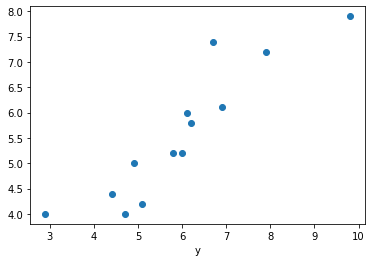

In [8]:
plt.scatter(X, y)
plt.xlabel('X')
plt.xlabel('y')

## Adam

#### Full Batch

In [9]:
def Adam_single_variable_batch(X, y, beta1, beta2, alpha, epsilon, maxNumIters):

    gradient_check = 0.001
    cost_check = 0.001
    v_0 = 0
    v_1 = 0
    v_0_hat = 0
    v_1_hat = 0
    m_0 = 0
    m_1 = 0
    m_0_hat = 0
    m_1_hat = 0
    theta_0 = 0
    theta_1 = 0
    
    thetas_0_list = []
    thetas_1_list = []
    cost = []
    hypothesis = []
    for i in range(maxNumIters):
        print(f'****************** Epoch {i} ********************')
        print()

        m = len(X)

        thetas_0_list.append(theta_0)
        thetas_1_list.append(theta_1)

        # 2- Prediction
        h = theta_0 + theta_1 * X
        hypothesis.append(h)

        # 3- Evaluate Prediction (Calculate loss/cost function)
        error = h - y

        # j = np.sum(error**2) / (2*m) # --> Normal equation
        # j = np.linalg.norm(error)**2 / (2*m) # --> By vector Norm
        mse = error @ error / (2*m) # --> By dot product

        j = np.sum(mse)
        cost.append(j)

        # 4- Get gradient
        d_theta_0 = np.sum(error) / m
        d_theta_1 = np.sum(error*X) / m

        d_theta = np.array([[d_theta_0],
                            [d_theta_1]])
        
        d_theta_norm = np.linalg.norm(d_theta)

        # 5- Update parameters
        m_0 = (beta_1*m_0) + ((1-beta_1) * d_theta_0)
        m_1 = (beta_1*m_1) + ((1-beta_1) * d_theta_1)
        
        m_0_hat = m_0 / (1 - beta_1)
        m_1_hat = m_1 / (1 - beta_1)
        
        v_0 = (beta_2*v_0) + ((1-beta_2) * (d_theta_0**2))
        v_1 = (beta_2*v_1) + ((1-beta_2) * (d_theta_1**2))

        v_0_hat = v_0 / (1 - beta_2)
        v_1_hat = v_1 / (1 - beta_2)

        theta_0 = theta_0 - ( alpha / ( np.sqrt(v_0_hat) + epsilon ) * m_0_hat )
        theta_1 = theta_1 - ( alpha / ( np.sqrt(v_1_hat) + epsilon ) * m_1_hat )

        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()
        
        print('Gradient Vector Norm:\n', d_theta_norm)
        print()

        if i > 0:
            if d_theta_norm <= gradient_check or abs(cost[-2] - cost[-1]) <= cost_check:
                break
        
        print(f'm_0_{i} : ', m_0)
        print(f'm_1_{i} : ', m_1)

        print()
        print(f'm_0_{i}_corrected : ', m_0_hat)
        print(f'm_1_{i}_corrected : ', m_1_hat)
        print()

        print(f'v_0_{i} : ', v_0)
        print(f'v_1_{i} : ', v_1)
        print()

        print(f'v_0_{i}_corrected : ', v_0_hat)
        print(f'v_1_{i}_corrected : ', v_1_hat)


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {i+1} epochs')
    print()

    print('theta_0_Opt : ', theta_0)
    print('theta_1_Opt : ', theta_1)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return thetas_0_list, thetas_1_list, cost, hypothesis, thetas_0_list[-1], thetas_1_list[-1]

#### Mini Batch

In [10]:
def Adam_single_variable_mini_batch(X, y, beta1, beta2, alpha, epsilon, maxNumIters, batch_size=None):

    # if batch not specified, consider it as full batch
    if not batch_size:
      batch_size = len(X)
    
    gradient_check = 0.001
    cost_check = 0.001
    v_0 = 0
    v_1 = 0
    v_0_hat = 0
    v_1_hat = 0
    m_0 = 0
    m_1 = 0
    m_0_hat = 0
    m_1_hat = 0
    theta_0 = 0
    theta_1 = 0
    
    thetas_0_list = []
    thetas_1_list = []
    cost = []
    cost_per_epoch = []
    hypothesis = []
    for epoch in range(maxNumIters):
        print(f'****************** Epoch {epoch} ********************')
        print()

        for i in range(len(X) // batch_size):

            thetas_0_list.append(theta_0)
            thetas_1_list.append(theta_1)

            # 2- Prediction
            start = i * batch_size
            end = i * batch_size + batch_size

            h = theta_0 + theta_1 * X[start:end]
            hypothesis.append(h)

            # 3- Evaluate Prediction (Calculate loss/cost function)
            error = h - y[start:end]
            mse = error @ error / (2*batch_size)
            j = np.sum(mse)
            cost.append(j)

            # 4- Get gradient
            d_theta_0 = np.sum(error) / batch_size
            d_theta_1 = np.sum(error * X[start:end]) / batch_size

            # 5- Update parameters
            m_0 = (beta_1*m_0) + ((1-beta_1) * d_theta_0)
            m_1 = (beta_1*m_1) + ((1-beta_1) * d_theta_1)
            
            m_0_hat = m_0 / (1 - beta_1)
            m_1_hat = m_1 / (1 - beta_1)
            
            v_0 = (beta_2*v_0) + ((1-beta_2) * (d_theta_0**2))
            v_1 = (beta_2*v_1) + ((1-beta_2) * (d_theta_1**2))

            v_0_hat = v_0 / (1 - beta_2)
            v_1_hat = v_1 / (1 - beta_2)

            theta_0 = theta_0 - ( alpha / ( np.sqrt(v_0_hat) + epsilon ) * m_0_hat )
            theta_1 = theta_1 - ( alpha / ( np.sqrt(v_1_hat) + epsilon ) * m_1_hat )

        d_theta = np.array([[d_theta_0],
                            [d_theta_1]])
        
        d_theta_norm = np.linalg.norm(d_theta)

        cost_per_epoch.append(j)

        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()
        
        print('Gradient Vector Norm:\n', d_theta_norm)
        print()

        if epoch > 0:
            if d_theta_norm <= gradient_check or abs(cost_per_epoch[-2] - cost_per_epoch[-1]) <= cost_check:
                break
        
        print(f'm_0_{epoch} : ', m_0)
        print(f'm_1_{i} : ', m_1)

        print()
        print(f'm_0_{epoch}_corrected : ', m_0_hat)
        print(f'm_1_{epoch}_corrected : ', m_1_hat)
        print()

        print(f'v_0_{epoch} : ', v_0)
        print(f'v_1_{epoch} : ', v_1)
        print()

        print(f'v_0_{epoch}_corrected : ', v_0_hat)
        print(f'v_1_{epoch}_corrected : ', v_1_hat)


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {epoch+1} epochs')
    print()

    print('theta_0_Opt : ', theta_0)
    print('theta_1_Opt : ', theta_1)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return thetas_0_list, thetas_1_list, cost, hypothesis, thetas_0_list[-1], thetas_1_list[-1]

#### Stochastic

In [11]:
def Adam_single_variable_stochastic(X, y, beta1, beta2, alpha, epsilon, maxNumIters):

    gradient_check = 0.001
    cost_check = 0.001
    v_0 = 0
    v_1 = 0
    v_0_hat = 0
    v_1_hat = 0
    m_0 = 0
    m_1 = 0
    m_0_hat = 0
    m_1_hat = 0
    theta_0 = 0
    theta_1 = 0
    
    thetas_0_list = []
    thetas_1_list = []
    cost = []
    cost_per_epoch = []
    hypothesis = []
    for epoch in range(maxNumIters):
        print(f'****************** Epoch {epoch} ********************')
        print()

        for i in range(len(X)):

            thetas_0_list.append(theta_0)
            thetas_1_list.append(theta_1)

            # 2- Prediction

            h = theta_0 + theta_1 * X[i]
            hypothesis.append(h)

            # 3- Evaluate Prediction (Calculate loss/cost function)
            error = h - y[i]
            j = error**2 / 2
            cost.append(j)

            # 4- Get gradient
            d_theta_0 = error
            d_theta_1 = error * X[i]

            # 5- Update parameters
            m_0 = (beta_1*m_0) + ((1-beta_1) * d_theta_0)
            m_1 = (beta_1*m_1) + ((1-beta_1) * d_theta_1)
            
            m_0_hat = m_0 / (1 - beta_1)
            m_1_hat = m_1 / (1 - beta_1)
            
            v_0 = (beta_2*v_0) + ((1-beta_2) * (d_theta_0**2))
            v_1 = (beta_2*v_1) + ((1-beta_2) * (d_theta_1**2))

            v_0_hat = v_0 / (1 - beta_2)
            v_1_hat = v_1 / (1 - beta_2)

            theta_0 = theta_0 - ( alpha / ( np.sqrt(v_0_hat) + epsilon ) * m_0_hat )
            theta_1 = theta_1 - ( alpha / ( np.sqrt(v_1_hat) + epsilon ) * m_1_hat )

        d_theta = np.array([[d_theta_0],
                            [d_theta_1]])
        
        d_theta_norm = np.linalg.norm(d_theta)

        cost_per_epoch.append(j)

        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()
        
        print('Gradient Vector Norm:\n', d_theta_norm)
        print()

        if epoch > 0:
            if d_theta_norm <= gradient_check or abs(cost_per_epoch[-2] - cost_per_epoch[-1]) <= cost_check:
                break
        
        print(f'm_0_{epoch} : ', m_0)
        print(f'm_1_{epoch} : ', m_1)

        print()
        print(f'm_0_{epoch}_corrected : ', m_0_hat)
        print(f'm_1_{epoch}_corrected : ', m_1_hat)
        print()

        print(f'v_0_{epoch} : ', v_0)
        print(f'v_1_{epoch} : ', v_1)
        print()

        print(f'v_0_{epoch}_corrected : ', v_0_hat)
        print(f'v_1_{epoch}_corrected : ', v_1_hat)


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {epoch+1} epochs')
    print()

    print('theta_0_Opt : ', theta_0)
    print('theta_1_Opt : ', theta_1)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return thetas_0_list, thetas_1_list, cost, hypothesis, thetas_0_list[-1], thetas_1_list[-1]

### Play with the parameters and see the results

##### The following results uses alpha = 0.05, beta1 = 0.05, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

In [12]:
alpha = 0.05
beta_1 = 0.05
beta_2 = 0.7
epsilon = 1e-08
iterations = 500
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Adam_single_variable_mini_batch(X, y, beta_1, beta_2, alpha, epsilon, iterations)

****************** Epoch 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error Vector:
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j =  16.305384479692318

Gradient Vector:
 [[ -5.56923074]
 [-35.04384604]]

Gradient Vector Norm:
 35.483622652335995

m_0_0 :  -5.290769202780768
m_1_0 :  -33.2916537410546

m_0_0_corrected :  -5.56923073976923
m_1_0_corrected :  -35.043846043215375

v_0_0 :  9.30489930983716
v_1_0 :  368.4213436501746

v_0_0_corrected :  31.016331032790525
v_1_0_corrected :  1228.071145500582
****************** Epoch 1 ********************

h(x): [0.195      0.38499999 0.295      0.445      0.54000001 0.395
 0.355      0.35999999 0.35       0.305      0.28499999 0.27
 0.34000001]

Error Vector:
 [-3.805      -7.0150001  -4.705      -6.7549998  -7.36000009 -5.7049999
 -5.645      -5.4400002  -4.84999981 -3.89499981 -3.71500001 -4.1300

In [13]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.8038016907036527


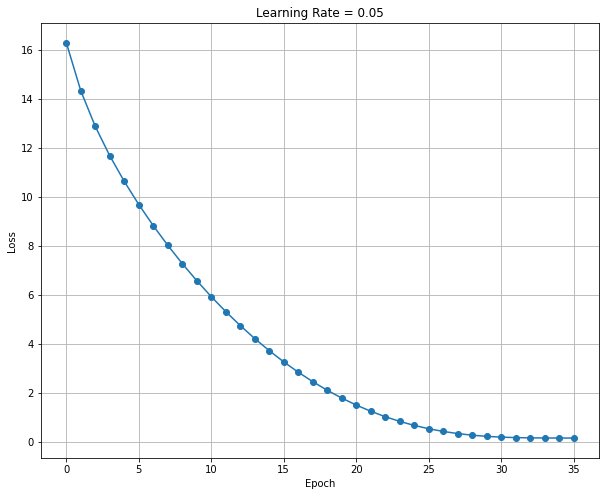

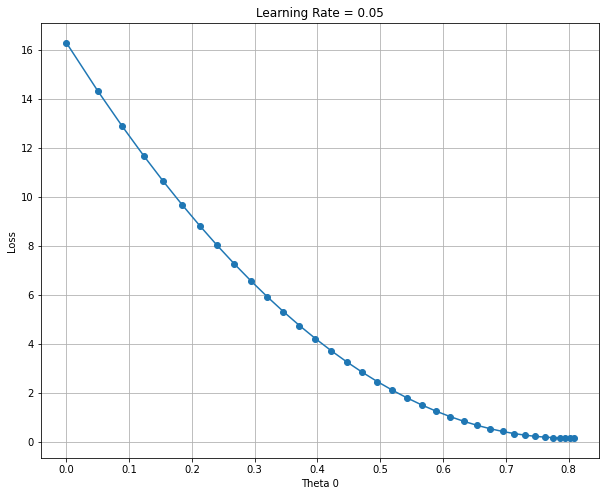

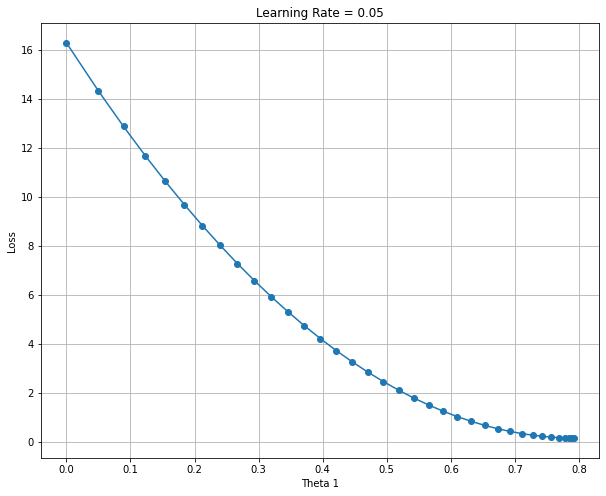

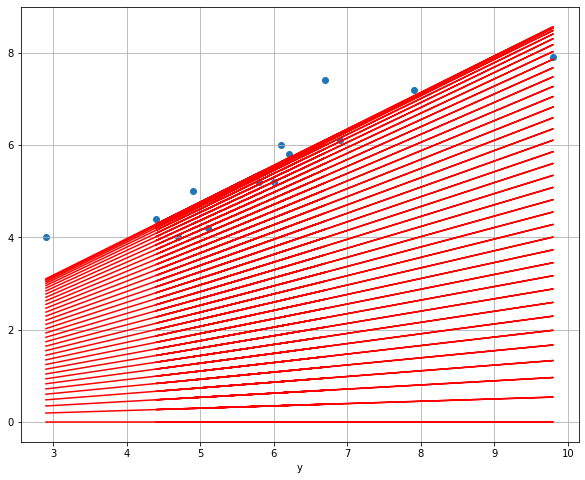

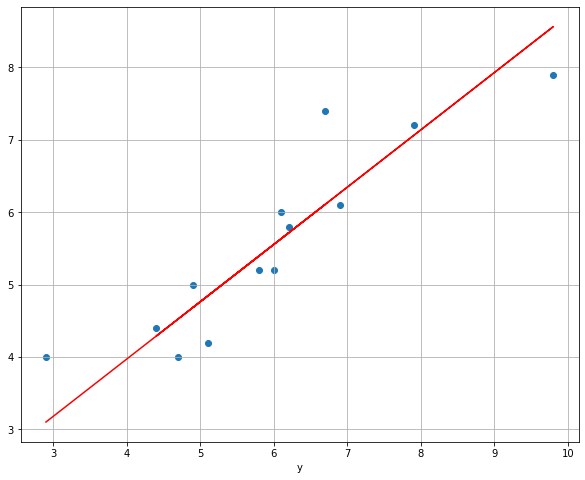

In [14]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.

In [15]:
alpha = 0.005
beta_1 = 0.5
beta_2 = 0.8
epsilon = 1e-08
iterations = 500
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Adam_single_variable_mini_batch(X, y, beta_1, beta_2, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.
 0.86261125]

Error Vector:
 [-3.50526092 -6.42322168 -4.25155599 -6.07099839 -6.52997898 -5.09785096
 -5.09933305 -4.88664801 -4.31201809 -3.42618533 -3.27692652 -3.71498232
 -4.33738856]

j =  11.564351666561253

Gradient Vector:
 [[ -4.68710375]
 [-29.44741948]]

Gradient Vector Norm:
 29.81810617423044

m_0_27 :  -4.717659880162075
m_1_0 :  -29.641274807988598

m_0_27_corrected :  -9.43531976032415
m_1_27_corrected :  -59.282549615977196

v_0_27 :  23.09248396657945
v_1_27 :  911.9624523673324

v_0_27_corrected :  115.46241983289728
v_1_27_corrected :  4559.812261836663
****************** Epoch 28 ********************

h(x): [0.5118593  1.01057905 0.7743434  1.16806955 1.41742946 1.0368275
 0.93183384 0.94495803 0.91870964 0.80059178 0.74809495 0.70872237
 0.89246126]

Error Vector:
 [-3.4881407  -6.38942104 -4.2256566  -6.03193026 -6.48257063 -5.0631724
 -5.06816616 -4.85504216 -4.28129017 -3.39940802 -3.25190505 -3.69127772
 -4.3

In [16]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.8016105731390011


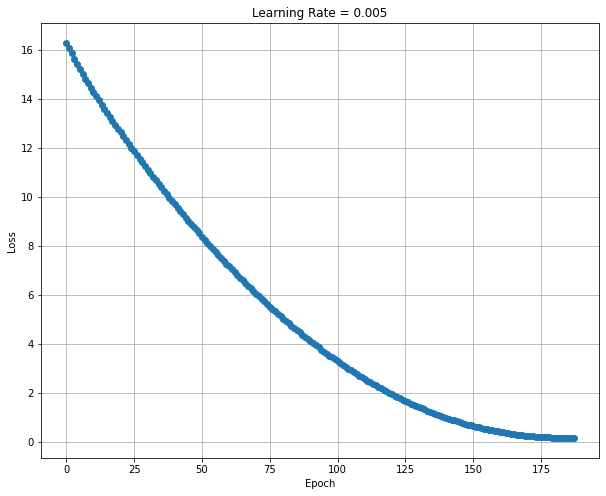

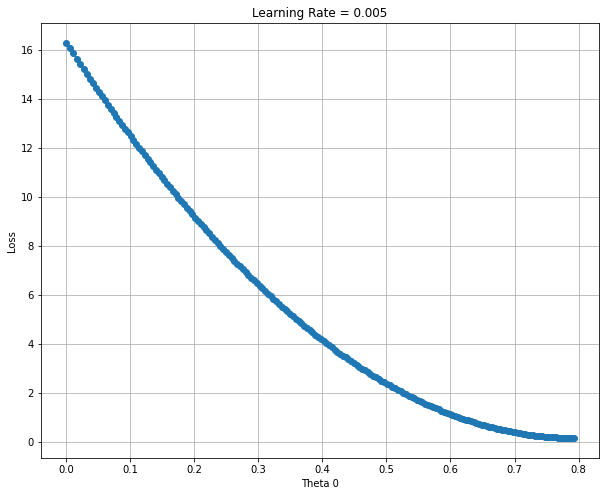

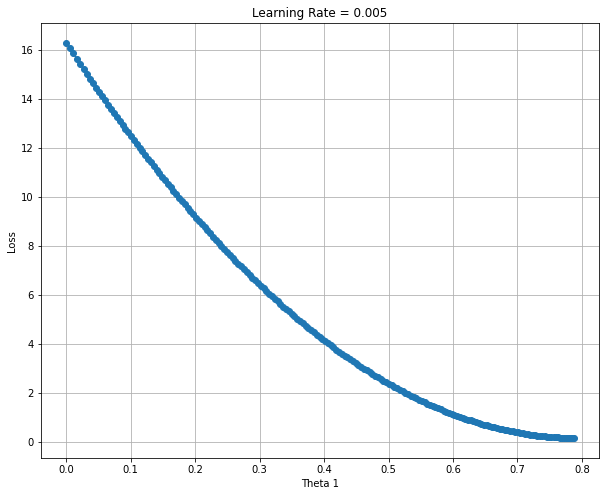

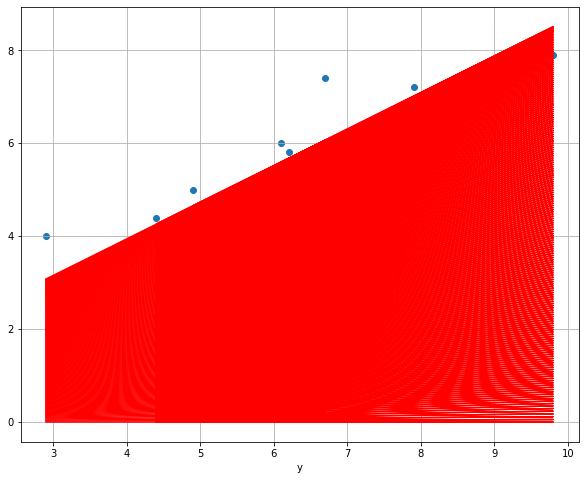

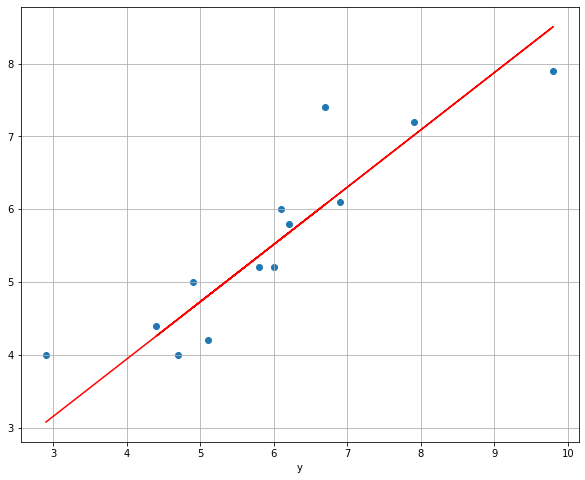

In [17]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 5000.

In [18]:
alpha = 0.0005
beta_1 = 0.8
beta_2 = 0.8
epsilon = 1e-08
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Adam_single_variable_mini_batch(X, y, beta_1, beta_2, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.
Error Vector:
 [-1.66019817 -2.78039339 -1.46030077 -1.86045449 -1.4205522  -1.36040328
 -1.74036245 -1.48036783 -1.00035707 -0.54031096 -0.58029068 -1.16027522
 -1.1203467 ]

j =  1.1307858998834526

Gradient Vector:
 [[-1.39727794]
 [-8.57594436]]

Gradient Vector Norm:
 8.689027987321612

m_0_539 :  -1.4283672601974489
m_1_0 :  -8.773182687923097

m_0_539_corrected :  -7.141836300987246
m_1_539_corrected :  -43.86591343961549

v_0_539 :  2.0414412414996734
v_1_539 :  77.01736434556886

v_0_539_corrected :  10.20720620749837
v_1_539_corrected :  385.08682172784444
****************** Epoch 540 ********************

h(x): [2.34416081 4.62821287 3.54629357 5.3494927  6.49151888 4.74842632
 4.26757311 4.32767969 4.20746652 3.66650673 3.42608012 3.24576038
 4.08725336]

Error Vector:
 [-1.65583919 -2.77178722 -1.45370643 -1.85050711 -1.40848122 -1.35157358
 -1.73242689 -1.47232051 -0.99253328 -0.53349308 -0.57391988 -1.15423972
 -1.112746

In [19]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.7939359609477404


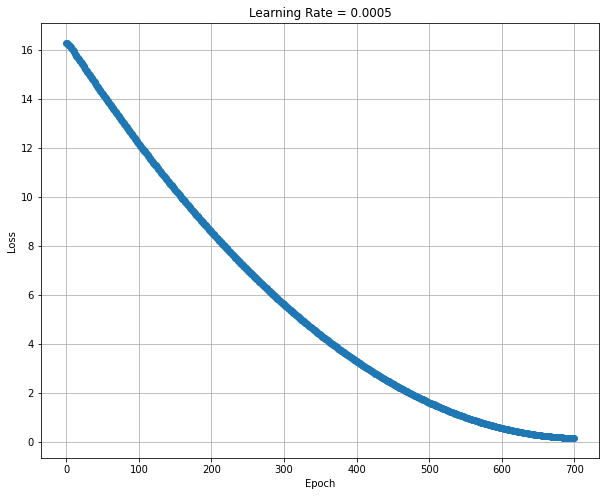

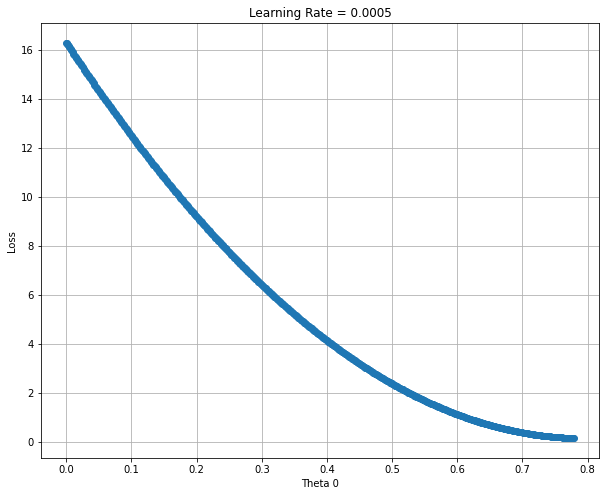

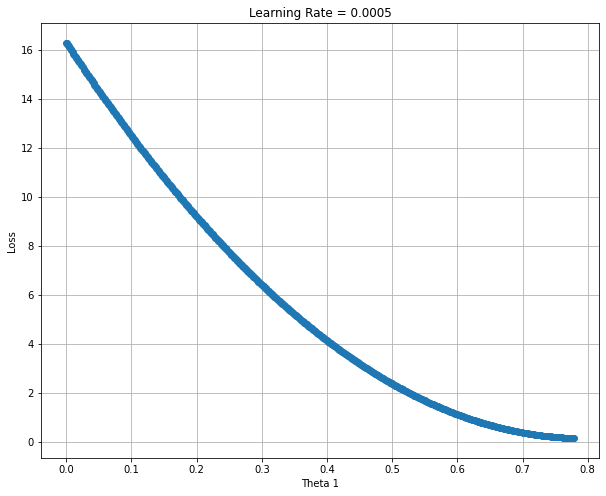

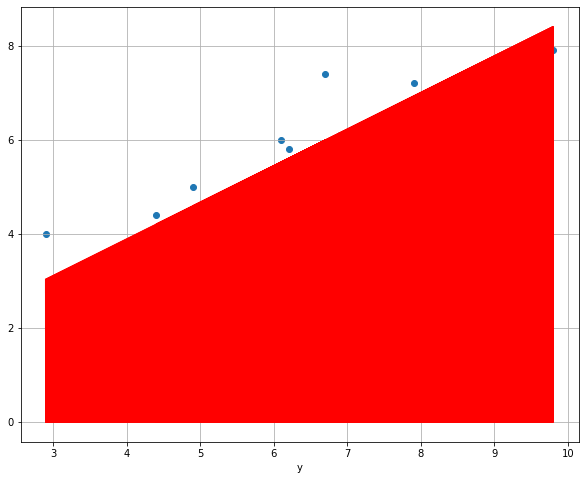

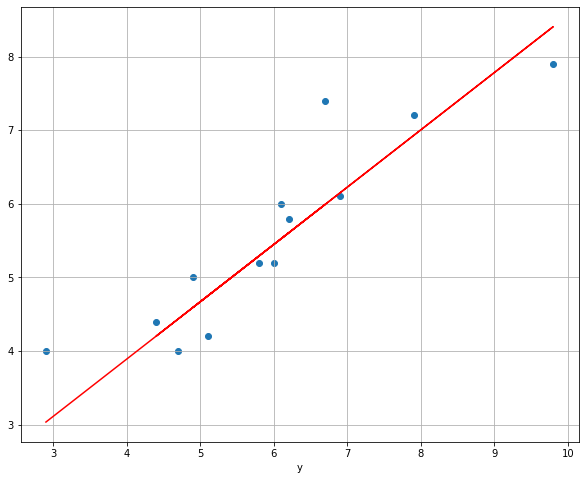

In [20]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [21]:
alpha = 0.001
beta_1 = 0.9
beta_2 = 0.99
epsilon = 1e-08
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Adam_single_variable_mini_batch(X, y, beta_1, beta_2, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.
 -1.29408661 -1.02783939 -0.56033384 -0.1565612  -0.22155137 -0.82029371
 -0.69282867]

j =  0.6047801475856731

Gradient Vector:
 [[-0.96014052]
 [-5.80355007]]

Gradient Vector Norm:
 5.882436845013707

m_0_702 :  -1.000806978601588
m_1_0 :  -6.061508987177283

m_0_702_corrected :  -10.008069786015882
m_1_702_corrected :  -60.615089871772845

v_0_702 :  2.3682712553305705
v_1_702 :  90.1132999806454

v_0_702_corrected :  236.82712553305683
v_1_702_corrected :  9011.329998064532
****************** Epoch 703 ********************

h(x): [2.58849631 5.10832672 3.91472294 5.90406289 7.16397825 5.24094957
 4.71045879 4.77677006 4.64414753 4.04734548 3.78210009 3.58316628
 4.51152499]

Error Vector:
 [-1.41150369 -2.29167337 -1.08527706 -1.29593692 -0.73602184 -0.85905033
 -1.28954121 -1.02323013 -0.55585228 -0.15265433 -0.21789991 -0.81683381
 -0.68847482]

j =  0.6004604187183786

Gradient Vector:
 [[-0.95568844]
 [-5.77530955]]

Gradient

In [22]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.7358819253373916


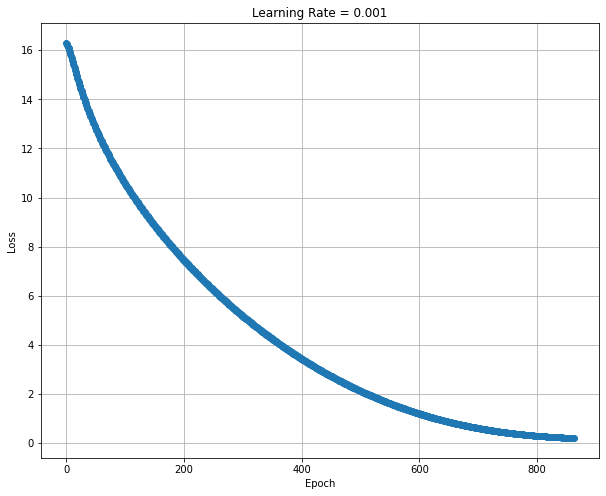

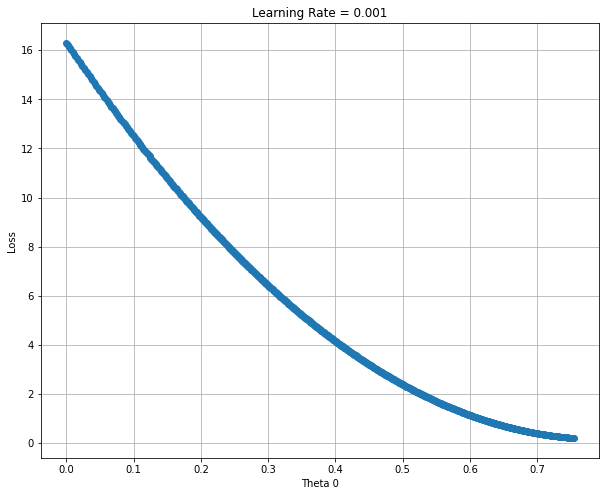

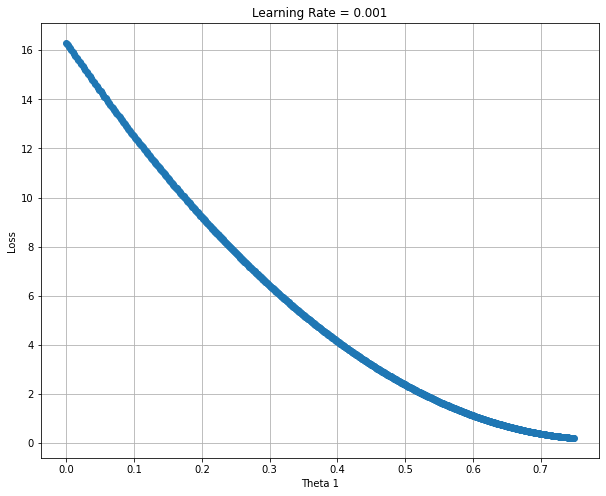

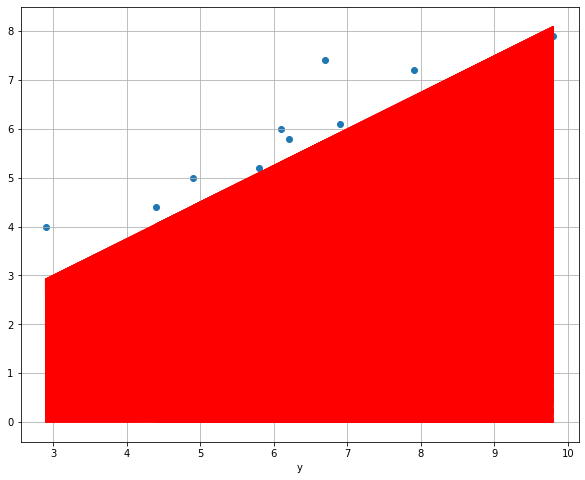

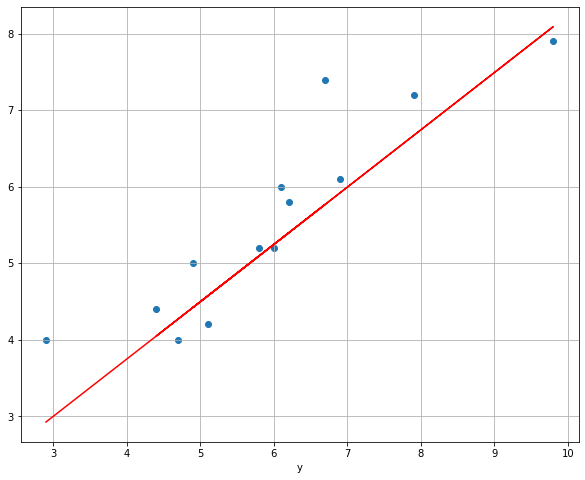

In [23]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [24]:
alpha = 0.001
beta_1 = 0.9
beta_2 = 0.5
epsilon = 1e-08
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Adam_single_variable_mini_batch(X, y, beta_1, beta_2, alpha, epsilon, iterations)

****************** Epoch 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error Vector:
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j =  16.305384479692318

Gradient Vector:
 [[ -5.56923074]
 [-35.04384604]]

Gradient Vector Norm:
 35.483622652335995

m_0_0 :  -0.5569230739769229
m_1_0 :  -3.5043846043215368

m_0_0_corrected :  -5.56923073976923
m_1_0_corrected :  -35.043846043215375

v_0_0 :  15.508165516395263
v_1_0 :  614.035572750291

v_0_0_corrected :  31.016331032790525
v_1_0_corrected :  1228.071145500582
****************** Epoch 1 ********************

h(x): [0.0039 0.0077 0.0059 0.0089 0.0108 0.0079 0.0071 0.0072 0.007  0.0061
 0.0057 0.0054 0.0068]

Error Vector:
 [-3.9961     -7.3923001  -4.9941     -7.19109981 -7.88920009 -6.0920999
 -5.9929     -5.79280019 -5.19299981 -4.19389981 -3.9943     -4.39460009
 -5.19319981]

j =  16.2647969383

In [25]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.5435416826862867


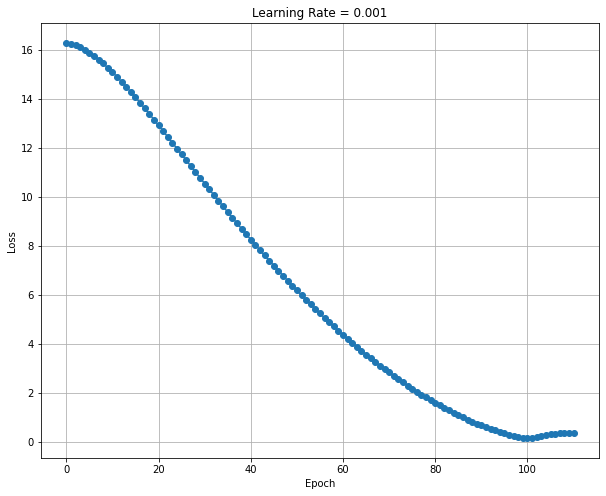

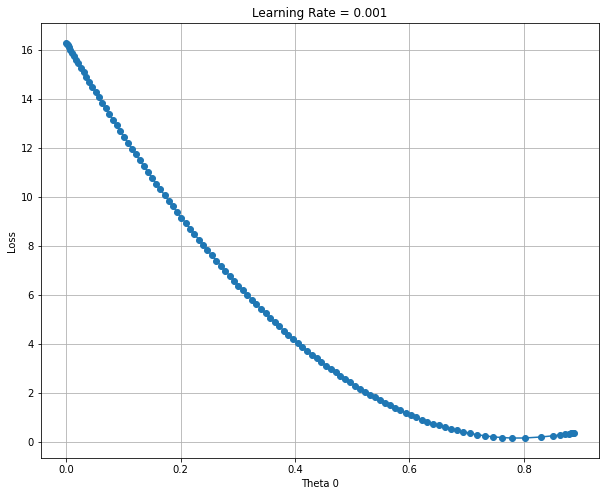

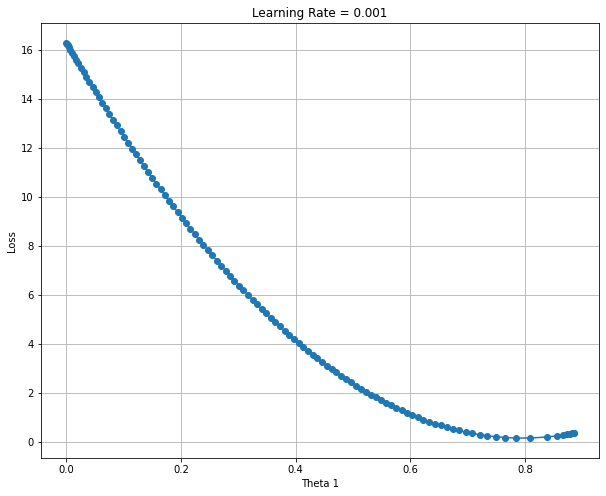

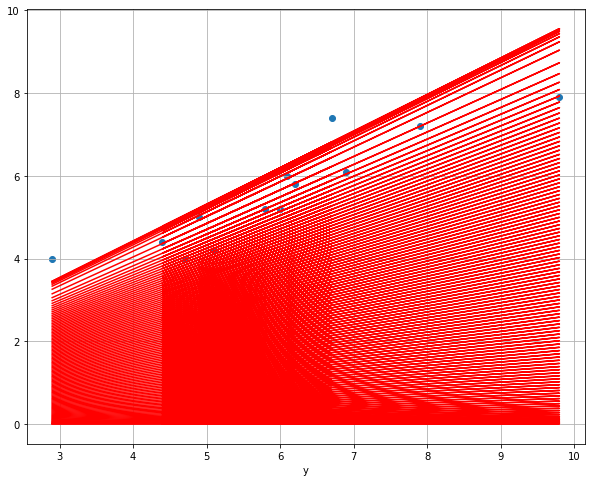

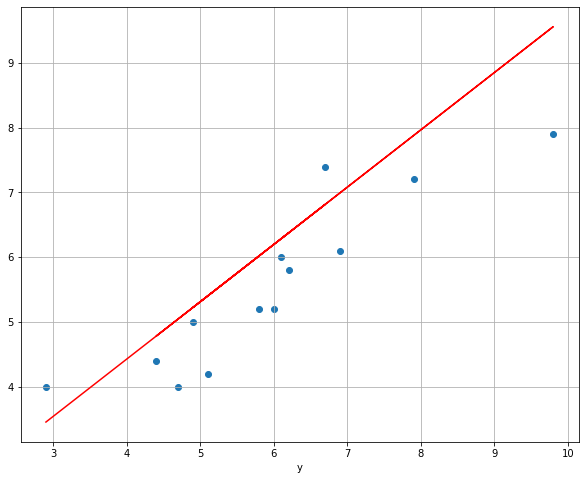

In [26]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [27]:
alpha = 0.001
beta_1 = 0.5
beta_2 = 0.99
epsilon = 1e-08
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Adam_single_variable_mini_batch(X, y, beta_1, beta_2, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.
 4.64206886 4.70744065 4.57669707 3.98835036 3.7268629  3.53074753
 4.4459535 ]

Error Vector:
 [-1.44983022 -2.3657002  -1.14239322 -1.38123752 -0.83917259 -0.93495612
 -1.35793114 -1.09255954 -0.62330274 -0.21164945 -0.2731371  -0.86925256
 -0.75404631]

j =  0.6676743404434078

Gradient Vector:
 [[-1.02270528]
 [-6.19982251]]

Gradient Vector Norm:
 6.283607666063908

m_0_3313 :  -1.0239353520655958
m_1_0 :  -6.207625994447177

m_0_3313_corrected :  -2.0478707041311917
m_1_3313_corrected :  -12.415251988894354

v_0_3313 :  1.3286303094561318
v_1_3313 :  49.36522006853582

v_0_3313_corrected :  132.86303094561308
v_1_3313_corrected :  4936.522006853577
****************** Epoch 3314 ********************

h(x): [2.55085989 5.03566148 3.8586503  5.82033591 7.06273686 5.1664407
 4.64332442 4.70871387 4.57793496 3.98942921 3.72787107 3.53170269
 4.44715604]

Error Vector:
 [-1.44914011 -2.36433862 -1.1413497  -1.3796639  -0.83726323 -0.93

In [28]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.3906714136318169


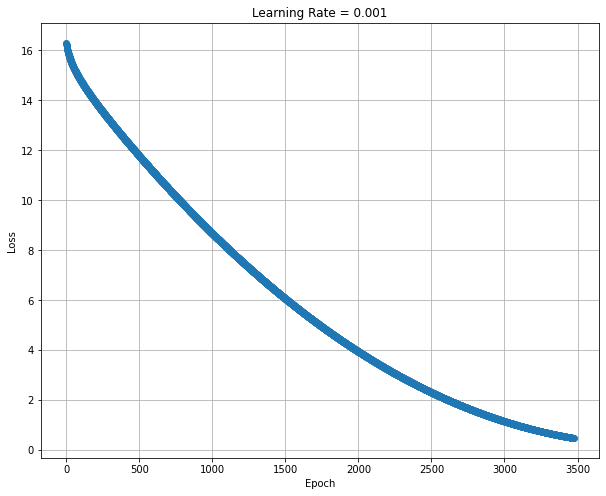

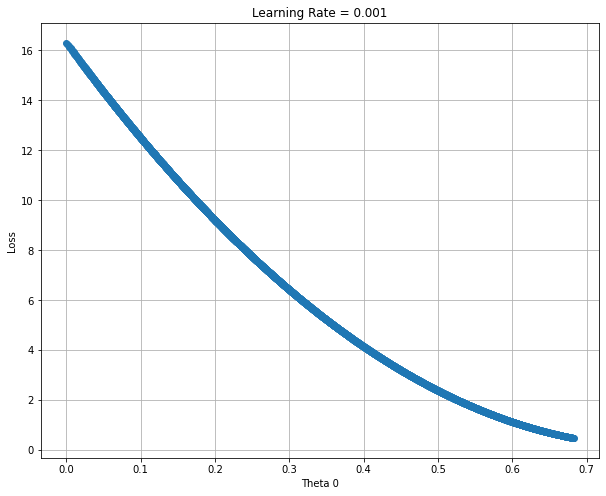

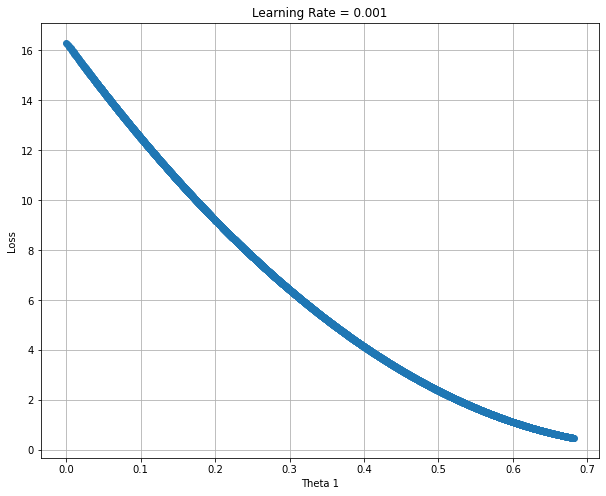

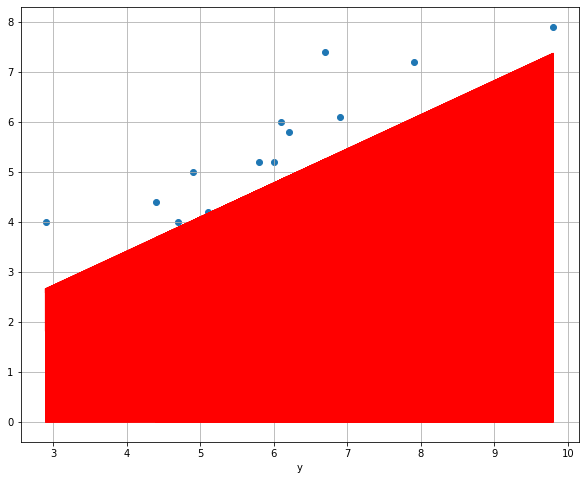

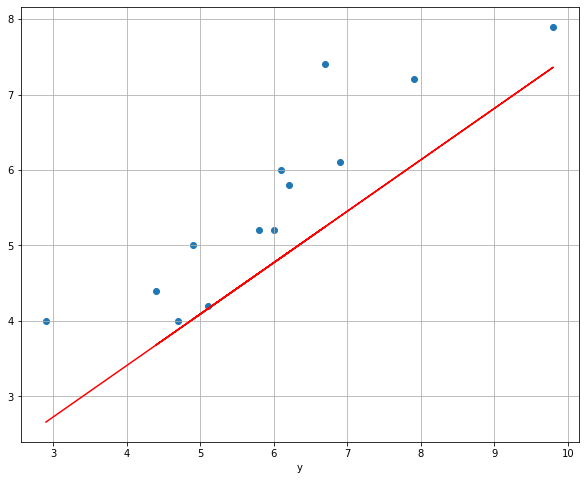

In [29]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [30]:
alpha = 0.001
beta_1 = 0.5
beta_2 = 0.5
epsilon = 1e-08
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Adam_single_variable_mini_batch(X, y, beta_1, beta_2, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.

Error Vector:
 [-1.83000079 -3.11564309 -1.71718081 -2.24795066 -1.89077191 -1.70436074
 -2.04948893 -1.79384818 -1.30512969 -0.80589873 -0.82846297 -1.3953859
 -1.41641158]

j =  1.6134152983674899

Gradient Vector:
 [[ -1.70004108]
 [-10.49674809]]

Gradient Vector Norm:
 10.63352528806133

m_0_394 :  -1.7098749672648865
m_1_0 :  -10.559136724634683

m_0_394_corrected :  -3.419749934529773
m_1_394_corrected :  -21.118273449269367

v_0_394 :  2.923865814638301
v_1_394 :  111.50315305986888

v_0_394_corrected :  5.847731629276602
v_1_394_corrected :  223.00630611973776
****************** Epoch 395 ********************

h(x): [2.17551445 4.29524607 3.29116276 4.96463522 6.02450116 4.40681106
 3.96055163 4.016334   3.90476927 3.40272748 3.17959777 3.01225068
 3.79320455]

Error Vector:
 [-1.82448555 -3.10475402 -1.70883724 -2.23536459 -1.87549894 -1.69318884
 -2.03944837 -1.78366619 -1.29523054 -0.79727233 -0.82040223 -1.38774941
 -1.40

In [31]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.7979356037613727


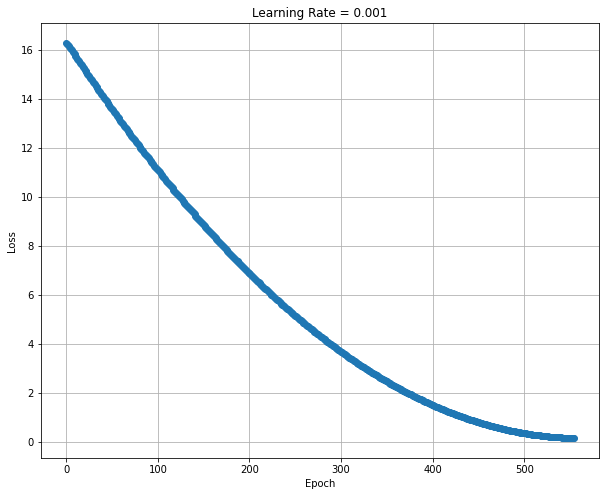

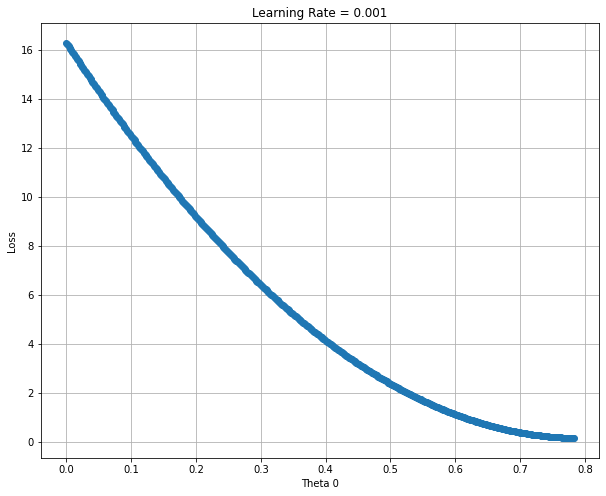

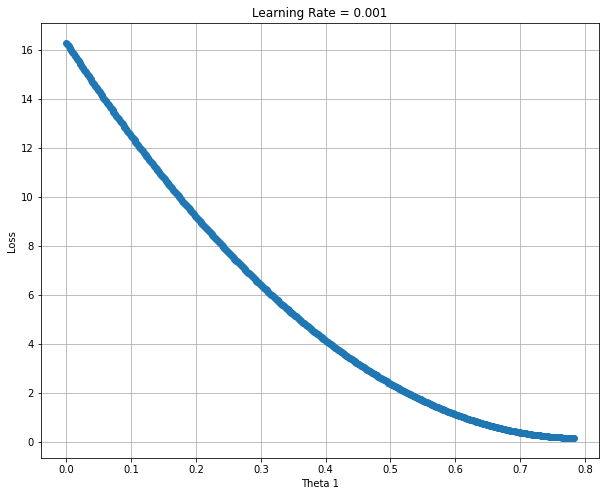

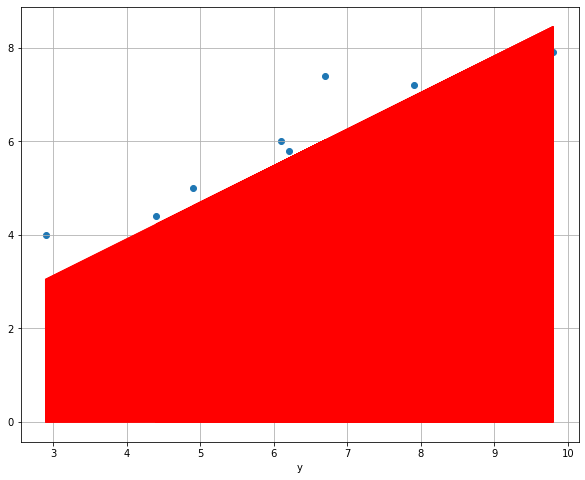

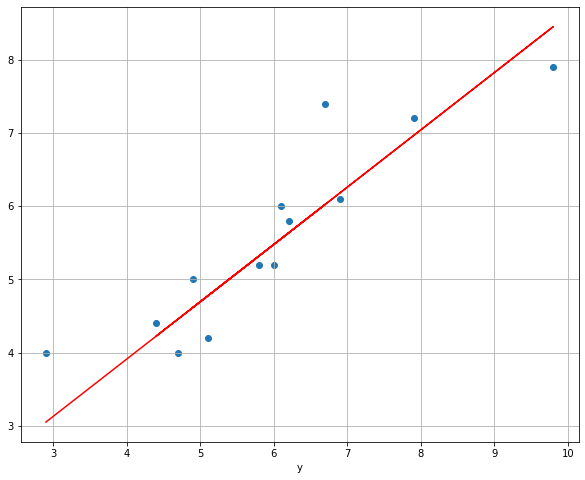

In [32]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [33]:
alpha = 0.01
beta_1 = 0.5
beta_2 = 0.9
epsilon = 1e-08
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Adam_single_variable_mini_batch(X, y, beta_1, beta_2, alpha, epsilon, iterations)

****************** Epoch 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error Vector:
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j =  16.305384479692318

Gradient Vector:
 [[ -5.56923074]
 [-35.04384604]]

Gradient Vector Norm:
 35.483622652335995

m_0_0 :  -2.784615369884615
m_1_0 :  -17.521923021607687

m_0_0_corrected :  -5.56923073976923
m_1_0_corrected :  -35.043846043215375

v_0_0 :  3.1016331032790516
v_1_0 :  122.80711455005816

v_0_0_corrected :  31.01633103279052
v_1_0_corrected :  1228.071145500582
****************** Epoch 1 ********************

h(x): [0.039 0.077 0.059 0.089 0.108 0.079 0.071 0.072 0.07  0.061 0.057 0.054
 0.068]

Error Vector:
 [-3.961      -7.3230001  -4.941      -7.11099981 -7.79200009 -6.0209999
 -5.929      -5.72800019 -5.12999981 -4.13899981 -3.943      -4.34600009
 -5.13199981]

j =  15.901807250530831

Gradie

In [34]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.8001856070524896


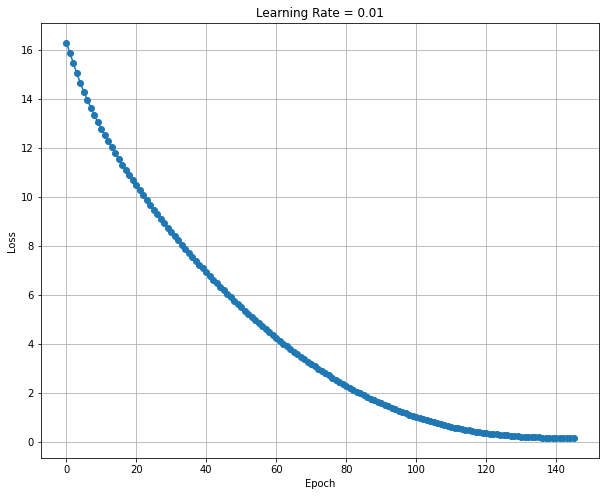

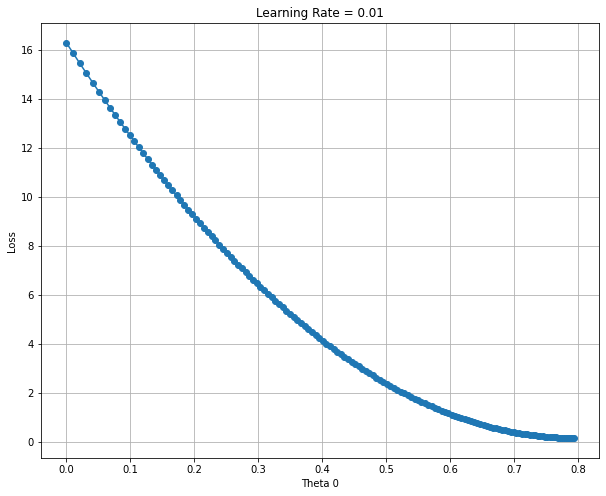

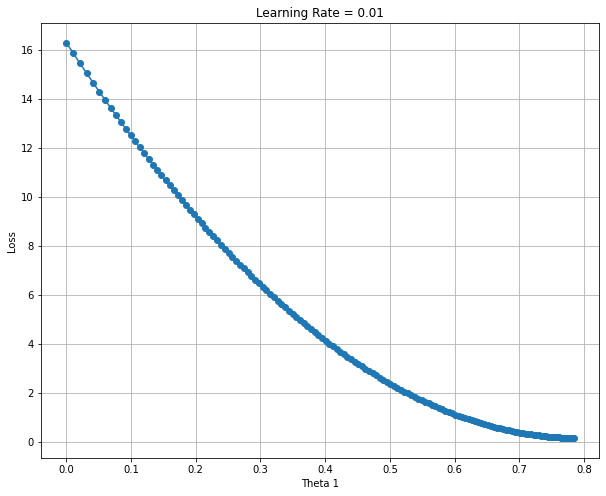

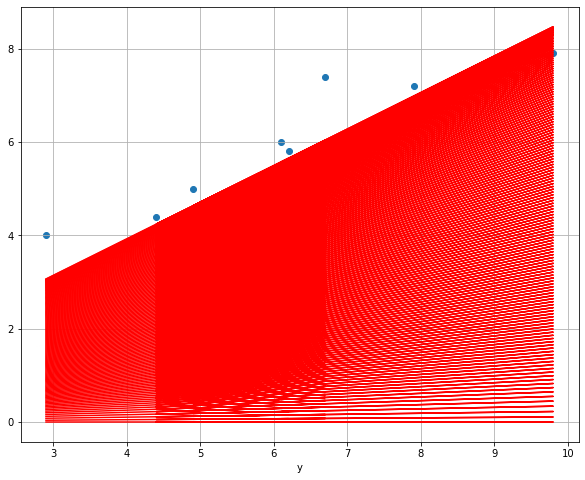

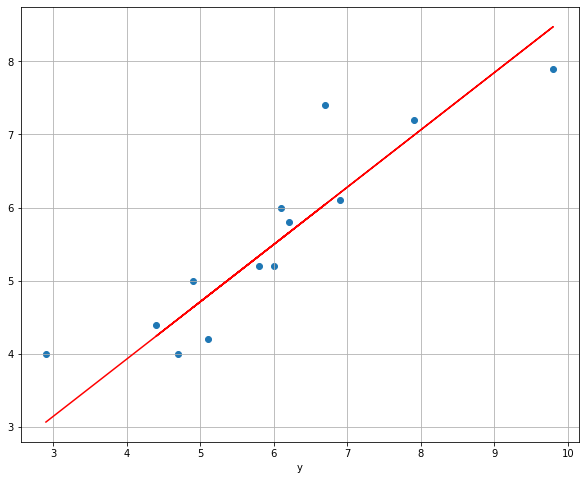

In [35]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

## Multivariate

#### Read MultiVarLR csv file into numpy array.
#### The first three columns are x1,X, and x3.
#### The last column is the target label y.

In [36]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [37]:
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [38]:
X = data[:, :-1]
y = data[:, -1]

In [39]:
X

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [40]:
y

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

### Generalize your implementation to work for MultiVariables
#### Vectorize your implementation.
<b>Notes:</b> 
- You need to add column that contains ones to the data. This column represent x feature for theta_0.
- Use learninig rate = 0.0001.

In [41]:
X = np.insert(X, 0, 1, axis=1)
X

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [42]:
y = y.reshape(len(y), 1)
y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

## Adam

#### Full Batch

In [43]:
def Adam_multi_variable_batch(X, y, beta1, beta2, alpha, epsilon, maxNumIters, ones=False):

    # Append ones to first columns if 'ones' parameter is true
    if ones:
      X = np.insert(X, 0, 1, axis=1)

    gradient_check = 0.001
    cost_check = 0.001

    v = np.zeros((X.shape[1], 1))
    v_hat = np.zeros((X.shape[1], 1))
    m = np.zeros((X.shape[1], 1))
    m_hat = np.zeros((X.shape[1], 1))
    theta = np.zeros((X.shape[1], 1))
    
    theta_list = []
    cost = []
    hypothesis = []
    for i in range(maxNumIters):
        print(f'****************** Epoch {i} ********************')
        print()

        theta_list.append(theta)

        # 2- Prediction
        h = X @ theta
        hypothesis.append(h)

        # 3- Evaluate Prediction (Calculate loss/cost function)
        error = h - y
        j = error.T @ error / (2*len(X))
        cost.append(j.squeeze())

        # 4- Get gradient
        d_theta = X.T @ error / len(X)

        # 5- Update parameters
        m = (beta_1*m) + ((1-beta_1) * d_theta)
        
        m_hat = m / (1 - beta_1)
        
        v = (beta_2*v) + ((1-beta_2) * (d_theta**2))

        v_hat = v / (1 - beta_2)

        theta = theta - ( alpha / ( np.sqrt(v_hat) + epsilon ) * m_hat )

        d_theta_norm = np.linalg.norm(d_theta)

        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()
        
        print('Gradient Vector Norm:\n', d_theta_norm)
        print()

        if i > 0:
            if d_theta_norm <= gradient_check or abs(cost[-1] - cost[-2]) <= cost_check:
                break
        
        print(f'm_{i} : ', m)

        print()
        print(f'm_{i}_corrected : ', m_hat)
        print()

        print(f'v_{i} : ', v)
        print()

        print(f'v_{i}_corrected : ', v_hat)


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {i+1} epochs')
    print()

    print('theta_Opt : ', theta)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return theta_list, cost, hypothesis, theta_list[-1]

#### Mini Batch

In [44]:
def Adam_multi_variable_mini_batch(X, y, beta1, beta2, alpha, epsilon, maxNumIters, batch_size=None, ones=False):

    # if batch not specified, consider it as full batch
    if not batch_size:
      batch_size = len(X)
    
    # Append ones to first columns if 'ones' parameter is true
    if ones:
      X = np.insert(X, 0, 1, axis=1)

    gradient_check = 0.001
    cost_check = 0.001

    v = np.zeros((X.shape[1], 1))
    v_hat = np.zeros((X.shape[1], 1))
    m = np.zeros((X.shape[1], 1))
    m_hat = np.zeros((X.shape[1], 1))
    theta = np.zeros((X.shape[1], 1))
    
    theta_list = []
    cost = []
    cost_per_epoch = []
    hypothesis = []
    for epoch in range(maxNumIters):
        print(f'****************** Epoch {epoch} ********************')
        print()

        for i in range(len(X) // batch_size):

            theta_list.append(theta)

            # 2- Prediction
            start = i * batch_size
            end = i * batch_size + batch_size

            h = X[start:end] @ theta
            hypothesis.append(h)

            # 3- Evaluate Prediction (Calculate loss/cost function)
            error = h - y[start:end]
            j = error.T @ error / (2*batch_size)
            cost.append(j.squeeze())

            # 4- Get gradient
            d_theta = X[start:end].T @ error / batch_size

            # 5- Update parameters
            m = (beta_1*m) + ((1-beta_1) * d_theta)
            
            m_hat = m / (1 - beta_1)
            
            v = (beta_2*v) + ((1-beta_2) * (d_theta**2))

            v_hat = v / (1 - beta_2)

            theta = theta - ( alpha / ( np.sqrt(v_hat) + epsilon ) * m_hat )


        d_theta_norm = np.linalg.norm(d_theta)

        cost_per_epoch.append(j)

        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()
        
        print('Gradient Vector Norm:\n', d_theta_norm)
        print()

        if epoch > 0:
            if d_theta_norm <= gradient_check or abs(cost_per_epoch[-1] - cost_per_epoch[-2]) <= cost_check:
                break
        
        print(f'm_{epoch} : ', m)

        print()
        print(f'm_{epoch}_corrected : ', m_hat)
        print()

        print(f'v_{epoch} : ', v)
        print()

        print(f'v_{epoch}_corrected : ', v_hat)


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {epoch+1} epochs')
    print()

    print('theta_Opt : ', theta)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return theta_list, cost, hypothesis, theta_list[-1]

#### Stochastic

In [45]:
def Adam_multi_variable_stochastic(X, y, beta1, beta2, alpha, epsilon, maxNumIters, ones=False):
    
    # Append ones to first columns if 'ones' parameter is true
    if ones:
      X = np.insert(X, 0, 1, axis=1)

    gradient_check = 0.001
    cost_check = 0.001

    v = np.zeros((X.shape[1], 1))
    v_hat = np.zeros((X.shape[1], 1))
    m = np.zeros((X.shape[1], 1))
    m_hat = np.zeros((X.shape[1], 1))
    theta = np.zeros((X.shape[1], 1))
    
    theta_list = []
    cost = []
    cost_per_epoch = []
    hypothesis = []
    for epoch in range(maxNumIters):
        print(f'****************** Epoch {epoch} ********************')
        print()

        for i in range(len(X)):

            theta_list.append(theta)

            # 2- Prediction

            h = X[i] @ theta
            hypothesis.append(h)

            # 3- Evaluate Prediction (Calculate loss/cost function)
            error = h - y[i]
            j = error.T @ error / 2
            cost.append(j.squeeze())

            # 4- Get gradient
            d_theta = X[i].T * error

            # 5- Update parameters
            m = (beta_1*m) + ((1-beta_1) * d_theta)
            
            m_hat = m / (1 - beta_1)
            
            v = (beta_2*v) + ((1-beta_2) * (d_theta**2))

            v_hat = v / (1 - beta_2)

            theta = theta - ( alpha / ( np.sqrt(v_hat) + epsilon ) * m_hat )


        d_theta_norm = np.linalg.norm(d_theta)

        cost_per_epoch.append(j)

        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()
        
        print('Gradient Vector Norm:\n', d_theta_norm)
        print()

        if epoch > 0:
          if d_theta_norm <= gradient_check or abs(cost_per_epoch[-1] - cost_per_epoch[-2]) <= cost_check:
                break
        
        print(f'm_{epoch} : ', m)

        print()
        print(f'm_{epoch}_corrected : ', m_hat)
        print()

        print(f'v_{epoch} : ', v)
        print()

        print(f'v_{epoch}_corrected : ', v_hat)


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {epoch+1} epochs')
    print()

    print('theta_Opt : ', theta)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return theta_list, cost, hypothesis, theta_list[-1]

### Play with the parameters and see the results

##### The following results uses alpha = 0.05, beta1 = 0.05, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

In [46]:
alpha = 0.05
beta_1 = 0.05
beta_2 = 0.7
epsilon = 1e-08
iterations = 5000
theta_list, cost, hypothesis, theta_opt = Adam_multi_variable_mini_batch(X, y, beta_1, beta_2, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.
h(x): [[156.03358163]
 [188.50696892]
 [185.13110372]
 [202.4385503 ]
 [143.42605552]
 [107.29781879]
 [152.61595834]
 [114.58397726]
 [177.49097981]
 [166.4160857 ]
 [146.48971338]
 [145.24171004]
 [190.39356634]
 [157.19188902]
 [153.56783051]
 [192.00171489]
 [149.01383413]
 [183.36392244]
 [181.23445445]
 [162.24791642]
 [178.73951852]
 [177.6390454 ]
 [170.10065533]
 [155.31786487]
 [194.7807441 ]]

Error Vector:
 [[ 4.03358163e+00]
 [ 3.50696892e+00]
 [ 5.13110372e+00]
 [ 6.43855030e+00]
 [ 1.42605552e+00]
 [ 6.29781879e+00]
 [ 3.61595834e+00]
 [-4.16022739e-01]
 [ 2.49097981e+00]
 [ 2.41608570e+00]
 [ 5.48971338e+00]
 [ 4.24171004e+00]
 [ 6.39356634e+00]
 [ 5.19188902e+00]
 [ 5.56783051e+00]
 [ 1.71488931e-03]
 [ 2.01383413e+00]
 [ 3.63922438e-01]
 [ 4.23445445e+00]
 [ 3.24791642e+00]
 [ 1.73951852e+00]
 [ 2.63904540e+00]
 [-4.89934467e+00]
 [ 6.31786487e+00]
 [ 2.78074410e+00]]

j =  [[8.49222705]]

Gradient Vector:
 [[  3.2106

In [47]:
h = X @ theta_opt
print('r2 score = ', r2_score(y, h))

r2 score =  0.9696220764494521


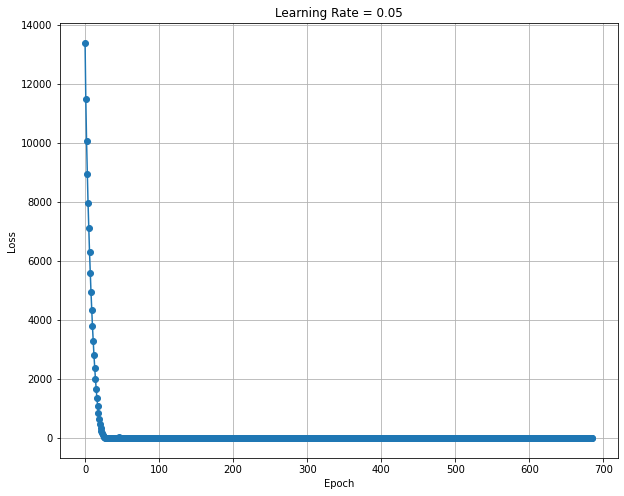

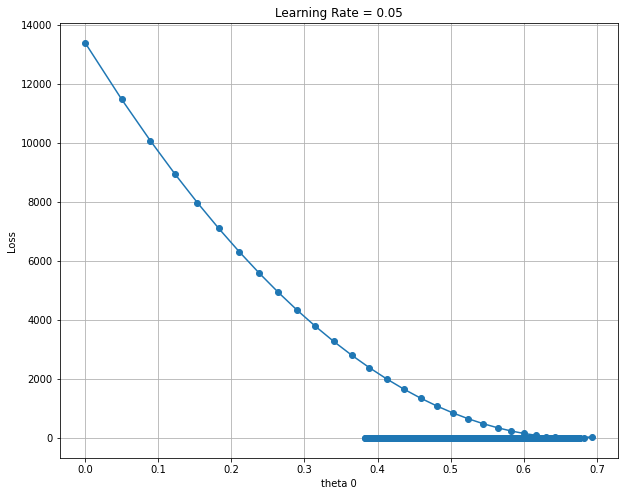

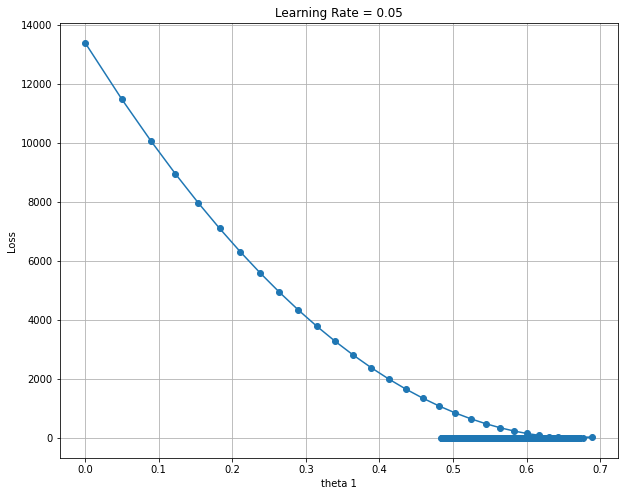

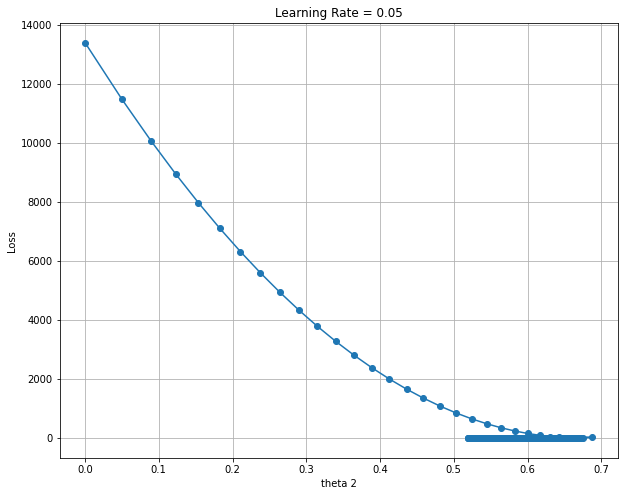

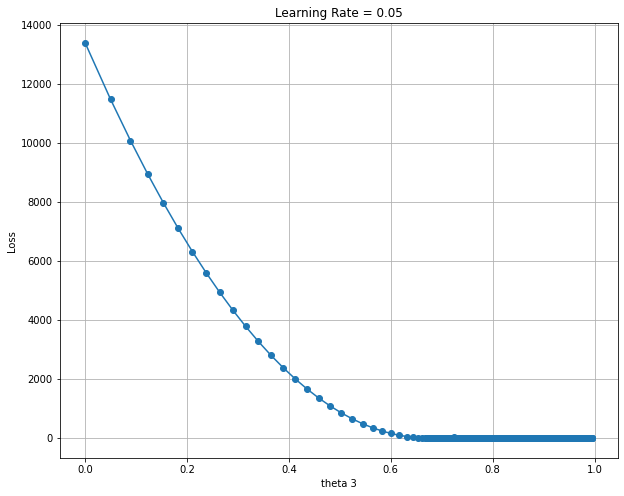

In [48]:
plot_loss_epoch(cost, alpha)
for i in range(np.array(theta_list).squeeze().shape[1]):
  plot_theta_loss(np.array(theta_list)[:,i], cost, alpha, f'theta {i}')

##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.

In [49]:
alpha = 0.005
beta_1 = 0.5
beta_2 = 0.8
epsilon = 1e-08
iterations = 500
theta_list, cost, hypothesis, theta_opt = Adam_multi_variable_mini_batch(X, y, beta_1, beta_2, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.
h(x): [[109.81632945]
 [131.87560257]
 [129.95735704]
 [141.46655722]
 [100.70497793]
 [ 74.32996881]
 [105.98009333]
 [ 78.64594585]
 [123.24384168]
 [114.13257256]
 [102.14367573]
 [100.70509846]
 [134.27322329]
 [111.73442189]
 [106.45966251]
 [133.79384254]
 [106.45936189]
 [127.08021976]
 [128.0390845 ]
 [114.61176487]
 [124.20290795]
 [123.72334573]
 [118.44830717]
 [110.77528215]
 [136.67103522]]

Error Vector:
 [[-42.18367055]
 [-53.12439743]
 [-50.04264296]
 [-54.53344278]
 [-41.29502207]
 [-26.67003119]
 [-43.01990667]
 [-36.35405415]
 [-51.75615832]
 [-49.86742744]
 [-38.85632427]
 [-40.29490154]
 [-49.72677671]
 [-40.26557811]
 [-41.54033749]
 [-58.20615746]
 [-40.54063811]
 [-55.91978024]
 [-48.9609155 ]
 [-44.38823513]
 [-52.79709205]
 [-51.27665427]
 [-56.55169283]
 [-38.22471785]
 [-55.32896478]]

j =  [[1109.01402717]]

Gradient Vector:
 [[  -46.4690208 ]
 [-3748.56056464]
 [-3768.61076603]
 [-3869.93144443]]

Gradient

In [50]:
from sklearn.metrics import r2_score

h = X @ theta_opt
print('r2 score = ', r2_score(y, h))

r2 score =  0.9782591941786183


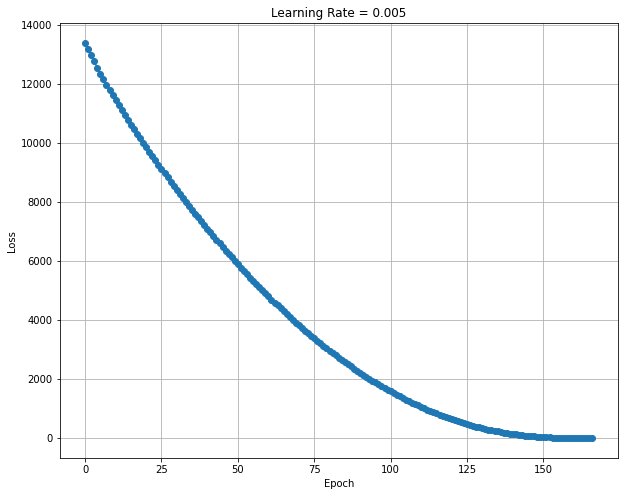

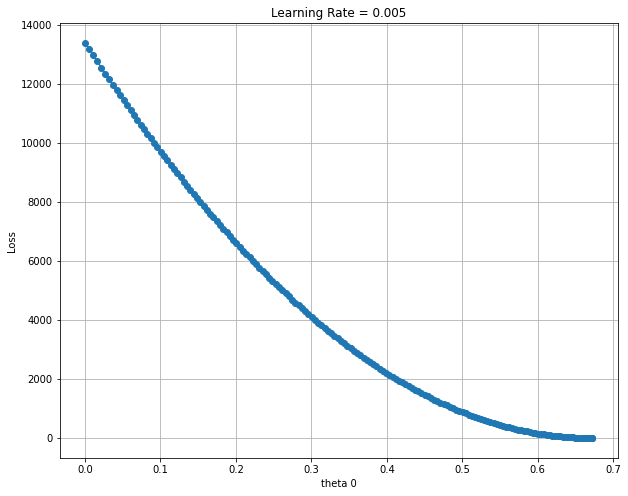

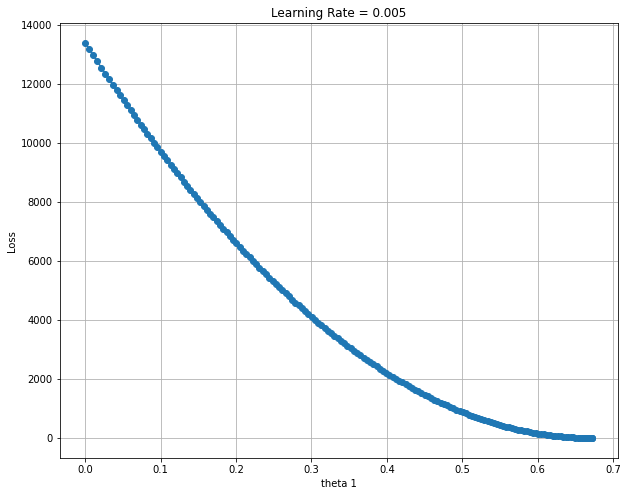

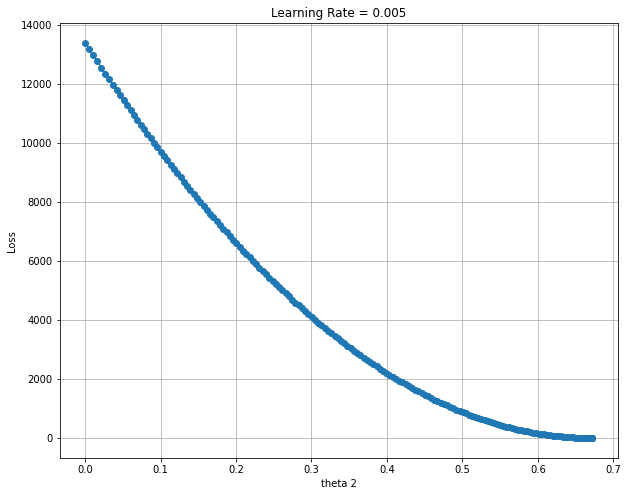

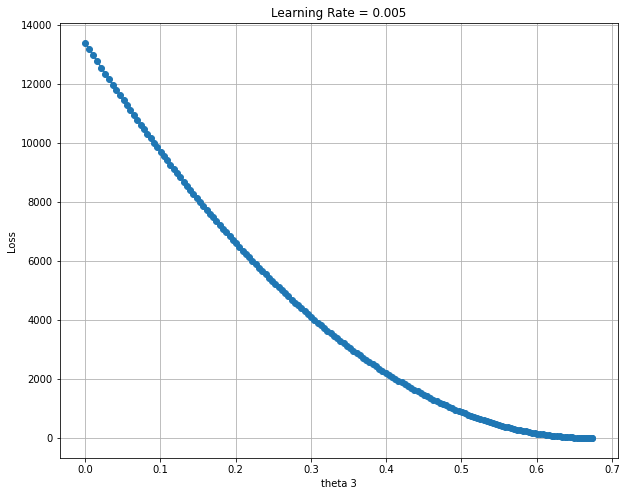

In [51]:
plot_loss_epoch(cost, alpha)
for i in range(np.array(theta_list).squeeze().shape[1]):
  plot_theta_loss(np.array(theta_list)[:,i], cost, alpha, f'theta {i}')

##### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 5000.

In [52]:
alpha = 0.0005
beta_1 = 0.8
beta_2 = 0.8
epsilon = 1e-08
iterations = 5000
theta_list, cost, hypothesis, theta_opt = Adam_multi_variable_mini_batch(X, y, beta_1, beta_2, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.
h(x): [[143.23709355]
 [172.00961976]
 [169.50765625]
 [184.51941045]
 [131.35279783]
 [ 96.95088481]
 [138.23319157]
 [102.58029527]
 [160.75081778]
 [148.86653014]
 [133.22927179]
 [131.35280966]
 [175.13705585]
 [145.73904202]
 [138.85868321]
 [174.51158271]
 [138.85865372]
 [165.75473367]
 [167.00569011]
 [149.49198478]
 [162.00179397]
 [161.37630302]
 [154.49591681]
 [144.48805861]
 [178.26451072]]

Error Vector:
 [[ -8.76290645]
 [-12.99038024]
 [-10.49234375]
 [-11.48058955]
 [-10.64720217]
 [ -4.04911519]
 [-10.76680843]
 [-12.41970473]
 [-14.24918222]
 [-15.13346986]
 [ -7.77072821]
 [ -9.64719034]
 [ -8.86294415]
 [ -6.26095798]
 [ -9.14131679]
 [-17.48841729]
 [ -8.14134628]
 [-17.24526633]
 [ -9.99430989]
 [ -9.50801522]
 [-14.99820603]
 [-13.62369698]
 [-20.50408319]
 [ -4.51194139]
 [-13.73548928]]

j =  [[71.47991825]]

Gradient Vector:
 [[ -11.29702448]
 [-909.97873532]
 [-914.40133288]
 [-949.20815895]]

Gradient Vecto

In [53]:
from sklearn.metrics import r2_score

h = X @ theta_opt
print('r2 score = ', r2_score(y, h))

r2 score =  0.97829403426205


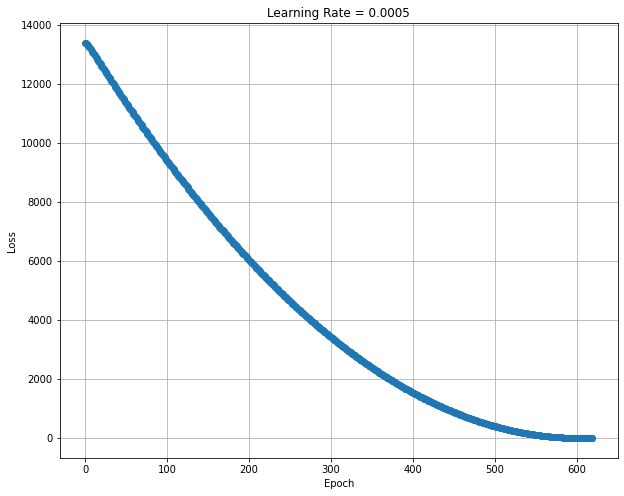

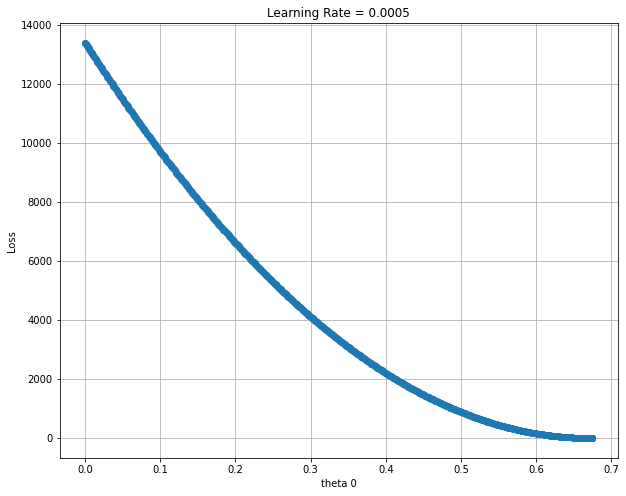

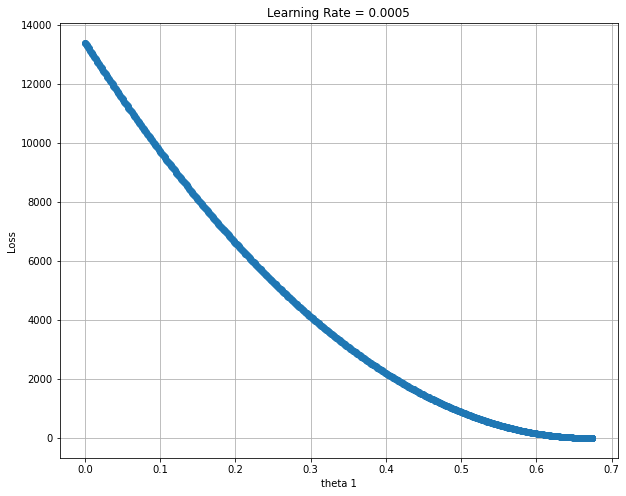

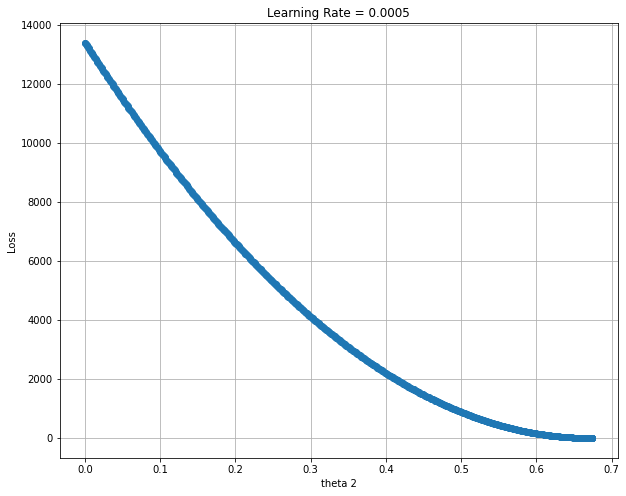

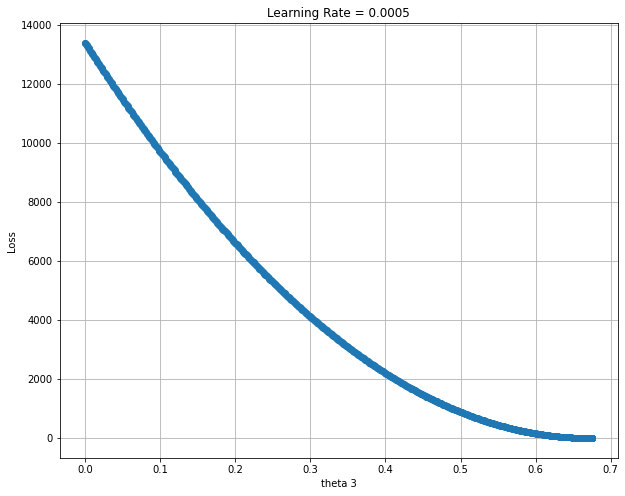

In [54]:
plot_loss_epoch(cost, alpha)
for i in range(np.array(theta_list).squeeze().shape[1]):
  plot_theta_loss(np.array(theta_list)[:,i], cost, alpha, f'theta {i}')

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [55]:
alpha = 0.001
beta_1 = 0.9
beta_2 = 0.99
epsilon = 1e-08
iterations = 5000
theta_list, cost, hypothesis, theta_opt = Adam_multi_variable_mini_batch(X, y, beta_1, beta_2, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.
h(x): [[153.2255913 ]
 [184.01027321]
 [181.33053308]
 [197.39294122]
 [140.51531   ]
 [103.71979861]
 [147.88108541]
 [109.74478841]
 [171.97164597]
 [159.26620671]
 [142.52591858]
 [140.52239016]
 [187.34901256]
 [155.89633877]
 [148.55147822]
 [186.68968772]
 [148.53381853]
 [177.32449327]
 [178.64920607]
 [159.91446358]
 [173.30819956]
 [172.63821378]
 [165.27695479]
 [154.55547176]
 [190.69898268]]

Error Vector:
 [[ 1.2255913 ]
 [-0.98972679]
 [ 1.33053308]
 [ 1.39294122]
 [-1.48469   ]
 [ 2.71979861]
 [-1.11891459]
 [-5.25521159]
 [-3.02835403]
 [-4.73379329]
 [ 1.52591858]
 [-0.47760984]
 [ 3.34901256]
 [ 3.89633877]
 [ 0.55147822]
 [-5.31031228]
 [ 1.53381853]
 [-5.67550673]
 [ 1.64920607]
 [ 0.91446358]
 [-3.69180044]
 [-2.36178622]
 [-9.72304521]
 [ 5.55547176]
 [-1.30101732]]

j =  [[6.36242523]]

Gradient Vector:
 [[ -0.78028784]
 [-61.23910509]
 [-60.99843834]
 [-75.87620977]]

Gradient Vector Norm:
 115.01671848343719

m

In [56]:
from sklearn.metrics import r2_score

h = X @ theta_opt
print('r2 score = ', r2_score(y, h))

r2 score =  0.9782612482487576


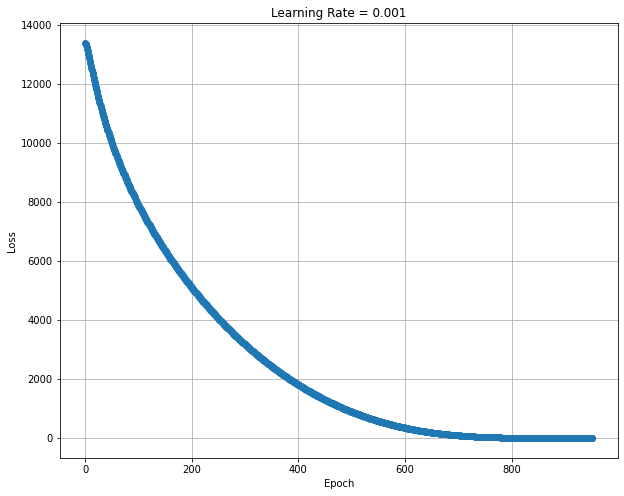

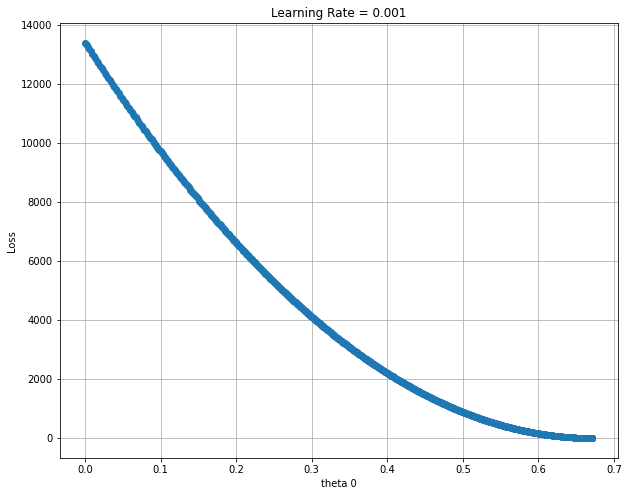

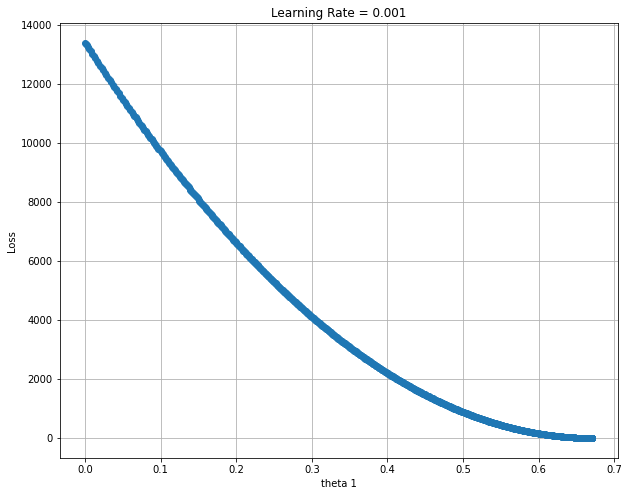

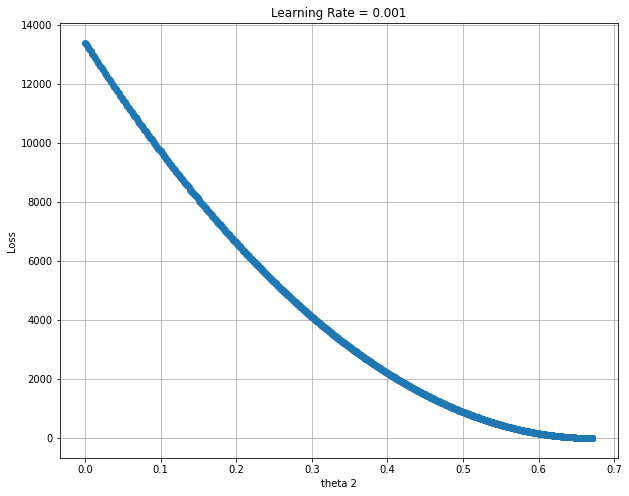

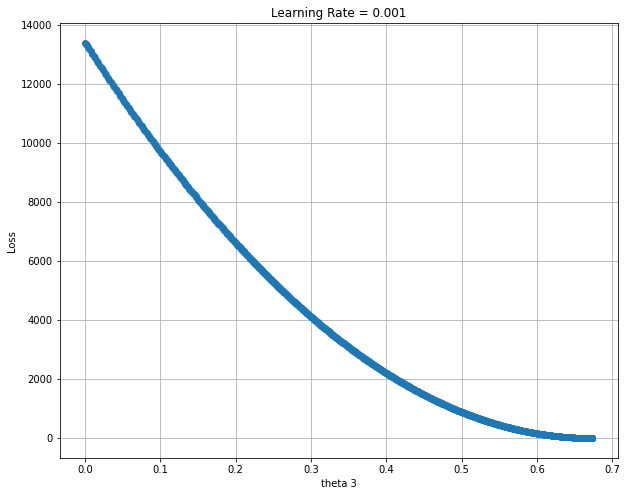

In [57]:
plot_loss_epoch(cost, alpha)
for i in range(np.array(theta_list).squeeze().shape[1]):
  plot_theta_loss(np.array(theta_list)[:,i], cost, alpha, f'theta {i}')

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [58]:
alpha = 0.001
beta_1 = 0.9
beta_2 = 0.5
epsilon = 1e-08
iterations = 5000
theta_list, cost, hypothesis, theta_opt = Adam_multi_variable_mini_batch(X, y, beta_1, beta_2, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.
h(x): [[152.7135642 ]
 [184.42104088]
 [181.15890116]
 [197.97757229]
 [140.41207829]
 [104.88521335]
 [149.12514394]
 [111.78022386]
 [173.50038724]
 [162.43262344]
 [143.23699514]
 [141.94988942]
 [186.41826639]
 [154.07789855]
 [150.03417151]
 [187.73908583]
 [146.18265554]
 [179.09842333]
 [177.48086196]
 [158.881957  ]
 [174.66833542]
 [173.68942632]
 [166.26598801]
 [152.27381972]
 [190.6173863 ]]

Error Vector:
 [[ 0.7135642 ]
 [-0.57895912]
 [ 1.15890116]
 [ 1.97757229]
 [-1.58792171]
 [ 3.88521335]
 [ 0.12514394]
 [-3.21977614]
 [-1.49961276]
 [-1.56737656]
 [ 2.23699514]
 [ 0.94988942]
 [ 2.41826639]
 [ 2.07789855]
 [ 2.03417151]
 [-4.26091417]
 [-0.81734446]
 [-3.90157667]
 [ 0.48086196]
 [-0.118043  ]
 [-2.33166458]
 [-1.31057368]
 [-8.73401199]
 [ 3.27381972]
 [-1.3826137 ]]

j =  [[3.78740663]]

Gradient Vector:
 [[ -0.39912364]
 [-35.01904971]
 [-36.16456737]
 [-42.04685667]]

Gradient Vector Norm:
 65.59197535764255

m_

In [59]:
from sklearn.metrics import r2_score

h = X @ theta_opt
print('r2 score = ', r2_score(y, h))

r2 score =  0.9874921244319524


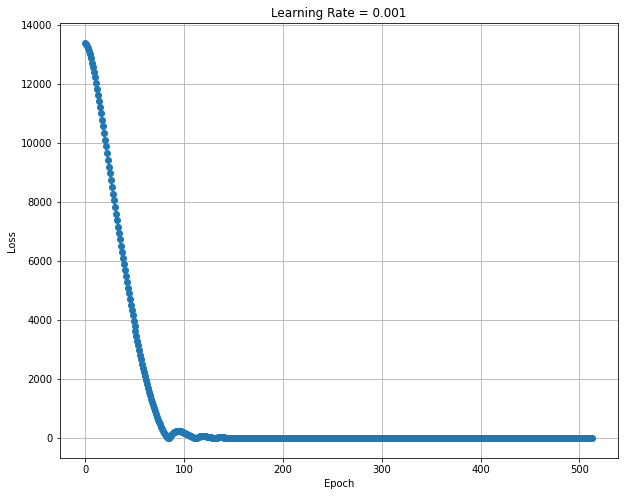

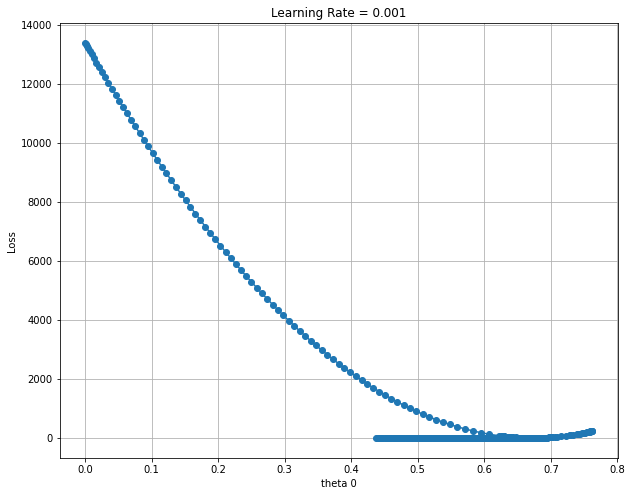

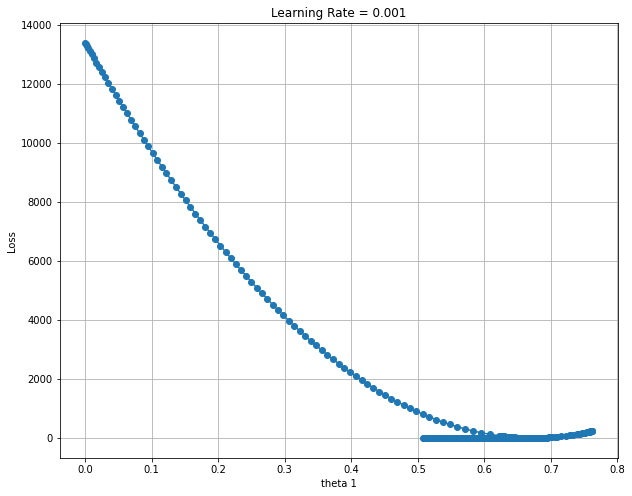

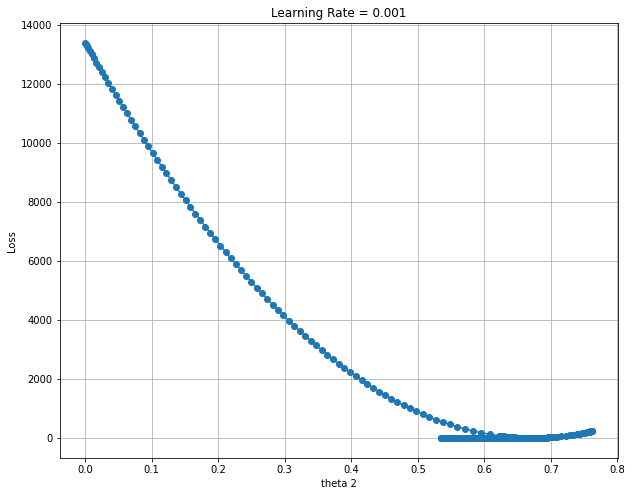

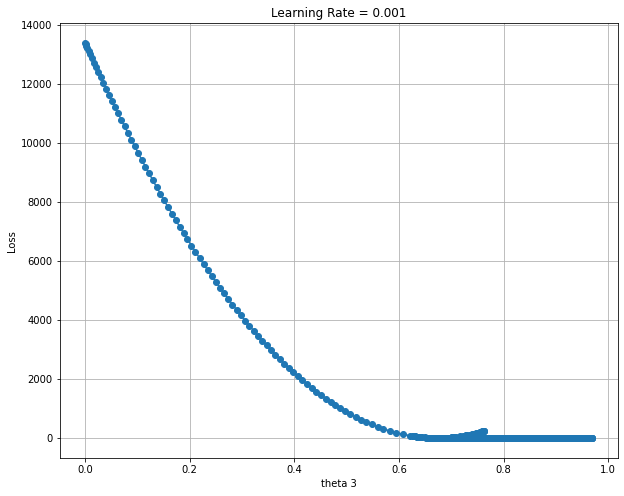

In [60]:
plot_loss_epoch(cost, alpha)
for i in range(np.array(theta_list).squeeze().shape[1]):
  plot_theta_loss(np.array(theta_list)[:,i], cost, alpha, f'theta {i}')

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [61]:
alpha = 0.001
beta_1 = 0.5
beta_2 = 0.99
epsilon = 1e-08
iterations = 5000
theta_list, cost, hypothesis, theta_opt = Adam_multi_variable_mini_batch(X, y, beta_1, beta_2, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.
h(x): [[153.46817193]
 [184.30036139]
 [181.61708769]
 [197.70410005]
 [140.73718232]
 [103.88225548]
 [148.11340665]
 [109.91612288]
 [172.24153393]
 [159.51434312]
 [142.75026124]
 [140.74274733]
 [187.64584655]
 [156.14437525]
 [148.78458511]
 [186.98337425]
 [148.7707052 ]
 [177.60284792]
 [178.93256946]
 [160.16810926]
 [173.58055408]
 [172.90970166]
 [165.53701529]
 [154.80195312]
 [191.00016829]]

Error Vector:
 [[ 1.46817193]
 [-0.69963861]
 [ 1.61708769]
 [ 1.70410005]
 [-1.26281768]
 [ 2.88225548]
 [-0.88659335]
 [-5.08387712]
 [-2.75846607]
 [-4.48565688]
 [ 1.75026124]
 [-0.25725267]
 [ 3.64584655]
 [ 4.14437525]
 [ 0.78458511]
 [-5.01662575]
 [ 1.7707052 ]
 [-5.39715208]
 [ 1.93256946]
 [ 1.16810926]
 [-3.41944592]
 [-2.09029834]
 [-9.46298471]
 [ 5.80195312]
 [-0.99983171]]

j =  [[6.18888442]]

Gradient Vector:
 [[ -0.52602482]
 [-40.71407318]
 [-40.35841993]
 [-54.76404058]]

Gradient Vector Norm:
 79.28312970948751

m_

In [62]:
from sklearn.metrics import r2_score

h = X @ theta_opt
print('r2 score = ', r2_score(y, h))

r2 score =  0.9782050751197421


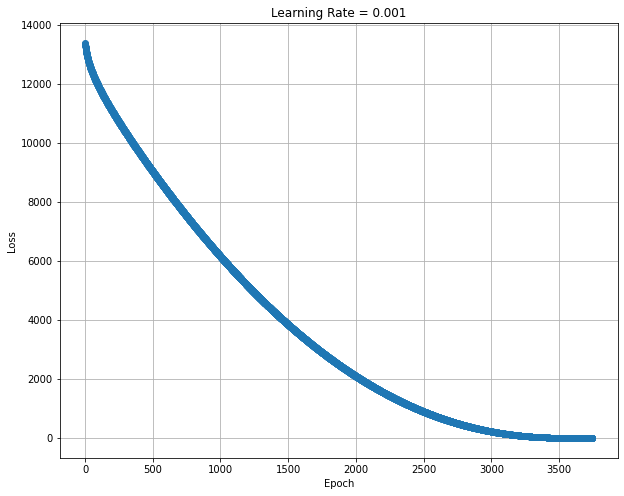

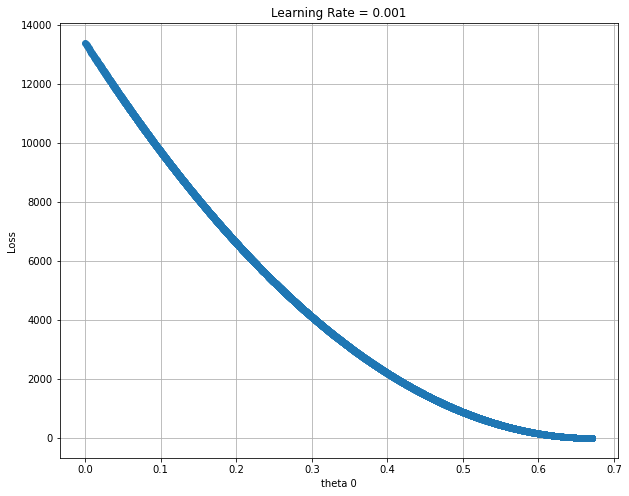

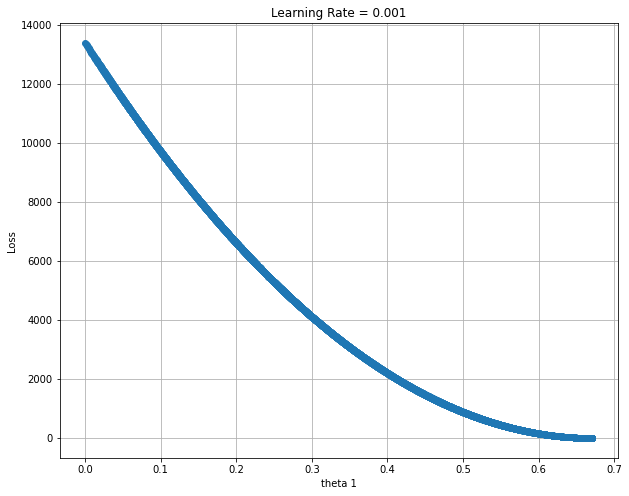

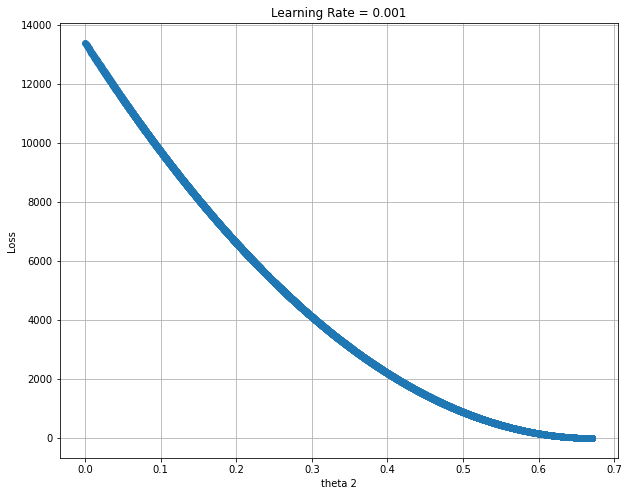

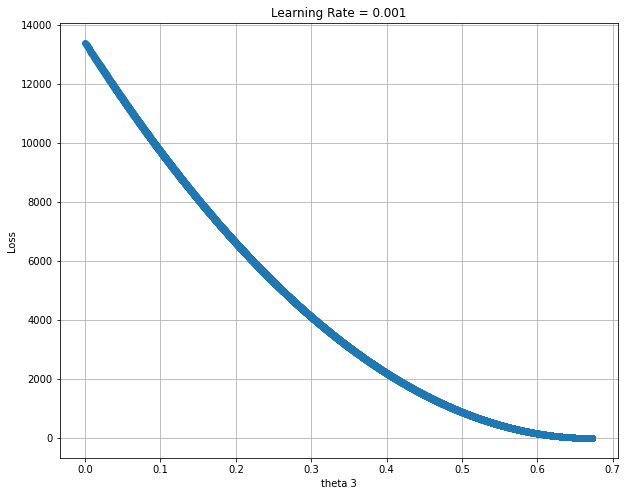

In [63]:
plot_loss_epoch(cost, alpha)
for i in range(np.array(theta_list).squeeze().shape[1]):
  plot_theta_loss(np.array(theta_list)[:,i], cost, alpha, f'theta {i}')

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [64]:
alpha = 0.001
beta_1 = 0.5
beta_2 = 0.5
epsilon = 1e-08
iterations = 5000
theta_list, cost, hypothesis, theta_opt = Adam_multi_variable_mini_batch(X, y, beta_1, beta_2, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.
h(x): [[153.28414867]
 [184.89755576]
 [181.74416332]
 [198.43014928]
 [140.89208071]
 [104.96127303]
 [149.27229716]
 [111.62019522]
 [173.68794277]
 [162.20073363]
 [143.50663386]
 [142.06284151]
 [187.19971295]
 [154.98224305]
 [150.13294429]
 [188.06958349]
 [147.20371289]
 [179.19236292]
 [178.28759833]
 [159.60034543]
 [174.86345663]
 [173.97951538]
 [166.52279305]
 [153.26560762]
 [191.22307016]]

Error Vector:
 [[ 1.28414867]
 [-0.10244424]
 [ 1.74416332]
 [ 2.43014928]
 [-1.10791929]
 [ 3.96127303]
 [ 0.27229716]
 [-3.37980478]
 [-1.31205723]
 [-1.79926637]
 [ 2.50663386]
 [ 1.06284151]
 [ 3.19971295]
 [ 2.98224305]
 [ 2.13294429]
 [-3.93041651]
 [ 0.20371289]
 [-3.80763708]
 [ 1.28759833]
 [ 0.60034543]
 [-2.13654337]
 [-1.02048462]
 [-8.47720695]
 [ 4.26560762]
 [-0.77692984]]

j =  [[4.06702231]]

Gradient Vector:
 [[ 3.31844396e-03]
 [-1.48847707e+00]
 [-2.17583210e+00]
 [-9.18054282e+00]]

Gradient Vector Norm:
 9.5515541

In [65]:
from sklearn.metrics import r2_score

h = X @ theta_opt
print('r2 score = ', r2_score(y, h))

r2 score =  0.9869424298580852


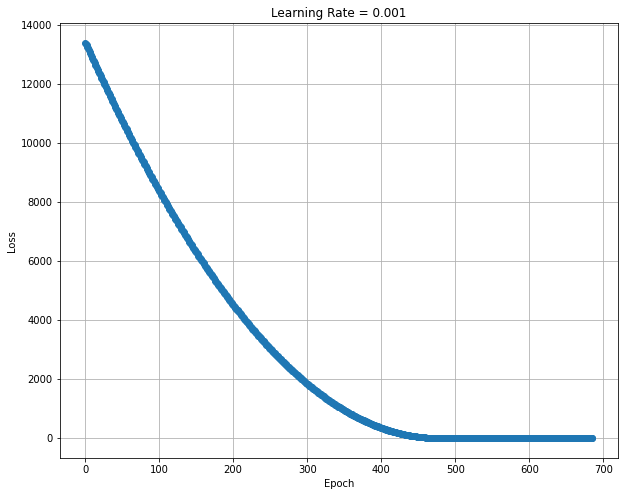

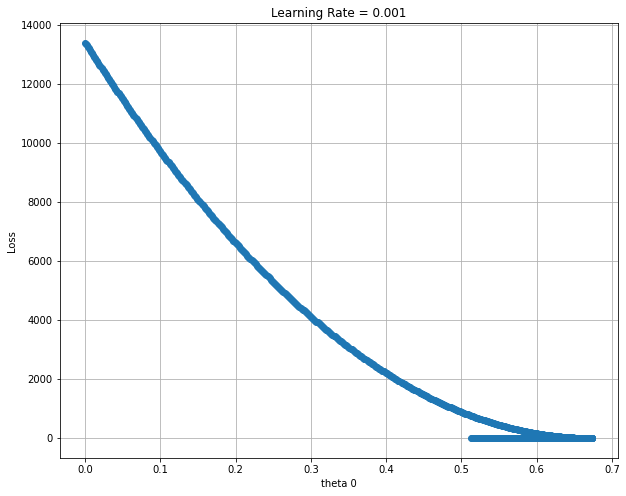

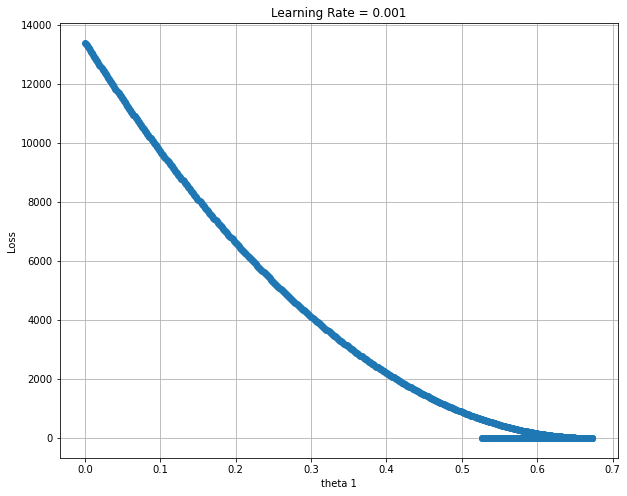

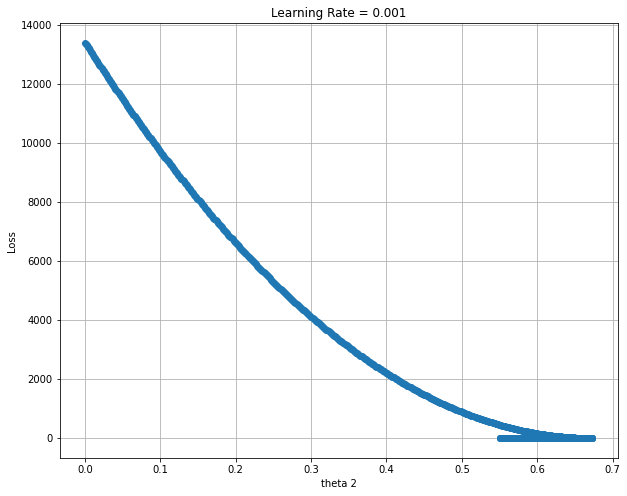

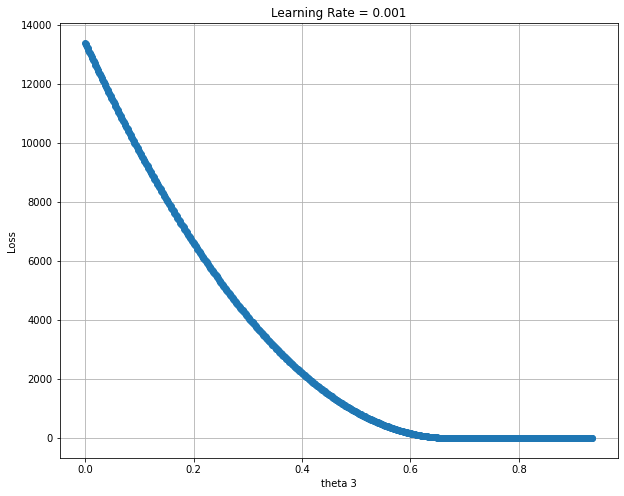

In [66]:
plot_loss_epoch(cost, alpha)
for i in range(np.array(theta_list).squeeze().shape[1]):
  plot_theta_loss(np.array(theta_list)[:,i], cost, alpha, f'theta {i}')

##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [67]:
alpha = 0.01
beta_1 = 0.9
beta_2 = 0.99
epsilon = 1e-08
iterations = 5000
theta_list, cost, hypothesis, theta_opt = Adam_multi_variable_mini_batch(X, y, beta_1, beta_2, alpha, epsilon, iterations)

Streaming output truncated to the last 5000 lines.
h(x): [[157.89364427]
 [189.61281629]
 [186.85338154]
 [203.40288467]
 [144.79452109]
 [106.87485742]
 [152.38141075]
 [113.08162399]
 [177.20431336]
 [164.10733566]
 [146.86445299]
 [144.79765855]
 [193.05726339]
 [160.649094  ]
 [153.0714723 ]
 [192.37210661]
 [153.0636467 ]
 [182.72024304]
 [184.09324366]
 [164.78758766]
 [178.58256083]
 [177.8926798 ]
 [170.30779121]
 [159.2689348 ]
 [196.50668747]]

Error Vector:
 [[ 5.89364427]
 [ 4.61281629]
 [ 6.85338154]
 [ 7.40288467]
 [ 2.79452109]
 [ 5.87485742]
 [ 3.38141075]
 [-1.91837601]
 [ 2.20431336]
 [ 0.10733566]
 [ 5.86445299]
 [ 3.79765855]
 [ 9.05726339]
 [ 8.649094  ]
 [ 5.0714723 ]
 [ 0.37210661]
 [ 6.0636467 ]
 [-0.27975696]
 [ 7.09324366]
 [ 5.78758766]
 [ 1.58256083]
 [ 2.8926798 ]
 [-4.69220879]
 [10.2689348 ]
 [ 4.50668747]]

j =  [[14.61824527]]

Gradient Vector:
 [[  4.12968848]
 [335.03594527]
 [337.46347912]
 [331.84839529]]

Gradient Vector Norm:
 579.8888653398084

m

In [68]:
from sklearn.metrics import r2_score

h = X @ theta_opt
print('r2 score = ', r2_score(y, h))

r2 score =  0.9780962007898607


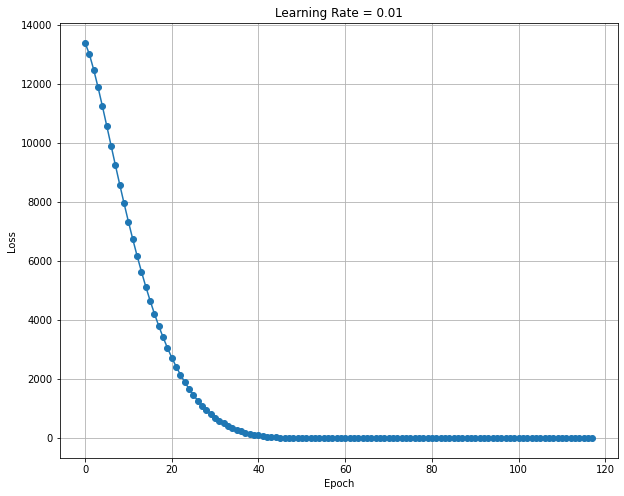

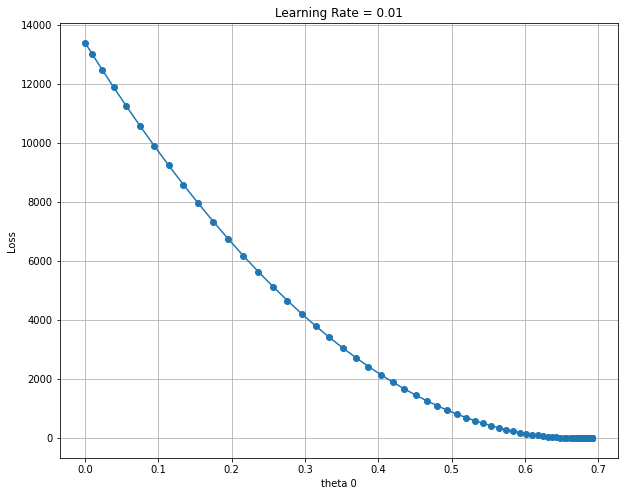

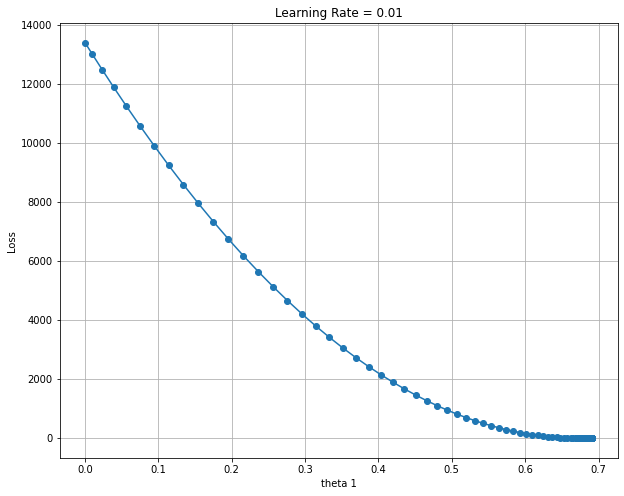

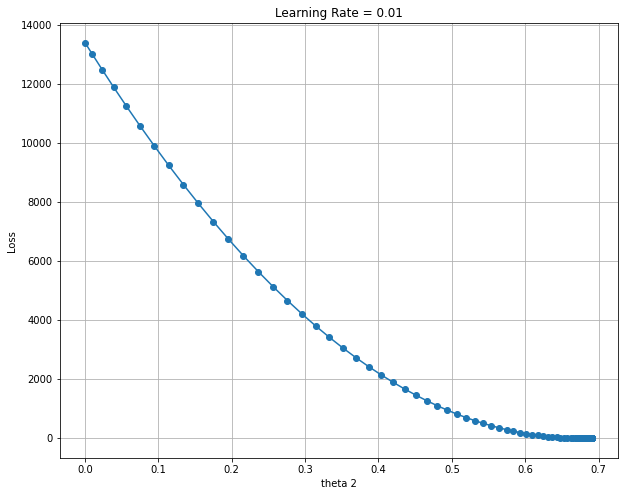

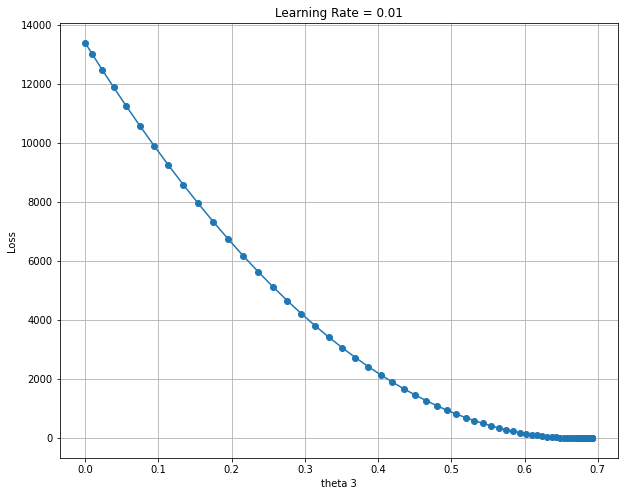

In [69]:
plot_loss_epoch(cost, alpha)
for i in range(np.array(theta_list).squeeze().shape[1]):
  plot_theta_loss(np.array(theta_list)[:,i], cost, alpha, f'theta {i}')

##### The following results uses alpha = 0.01, beta1 = 0.5, beta2 = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [70]:
alpha = 0.01
beta_1 = 0.5
beta_2 = 0.9
epsilon = 1e-08
iterations = 300
theta_list, cost, hypothesis, theta_opt = Adam_multi_variable_mini_batch(X, y, beta_1, beta_2, alpha, epsilon, iterations, batch_size=5)

Streaming output truncated to the last 5000 lines.

h(x): [[174.48635073]
 [173.54495481]
 [166.16794741]
 [152.93160911]
 [190.75207249]]

Error Vector:
 [[-2.51364927]
 [-1.45504519]
 [-8.83205259]
 [ 3.93160911]
 [-1.24792751]]

j =  [[10.34556154]]

Gradient Vector:
 [[  -2.02341309]
 [-168.23039558]
 [-171.65632217]
 [-189.17215876]]

Gradient Vector Norm:
 305.87180123577707

m_190 :  [[  -1.10392235]
 [ -95.20254548]
 [ -97.74899549]
 [-109.47908152]]

m_190_corrected :  [[  -2.2078447 ]
 [-190.40509096]
 [-195.49799097]
 [-218.95816304]]

v_190 :  [[3.56920279e+00]
 [2.42524819e+04]
 [2.52892160e+04]
 [2.73887039e+04]]

v_190_corrected :  [[3.56920279e+01]
 [2.42524819e+05]
 [2.52892160e+05]
 [2.73887039e+05]]
****************** Epoch 191 ********************

h(x): [[174.4900435 ]
 [173.54687692]
 [166.17051338]
 [152.92338997]
 [190.7502041 ]]

Error Vector:
 [[-2.5099565 ]
 [-1.45312308]
 [-8.82948662]
 [ 3.92338997]
 [-1.2497959 ]]

j =  [[10.33262609]]

Gradient Vector:
 [

In [71]:
from sklearn.metrics import r2_score

h = X @ theta_opt
print('r2 score = ', r2_score(y, h))

r2 score =  0.9867945902775054


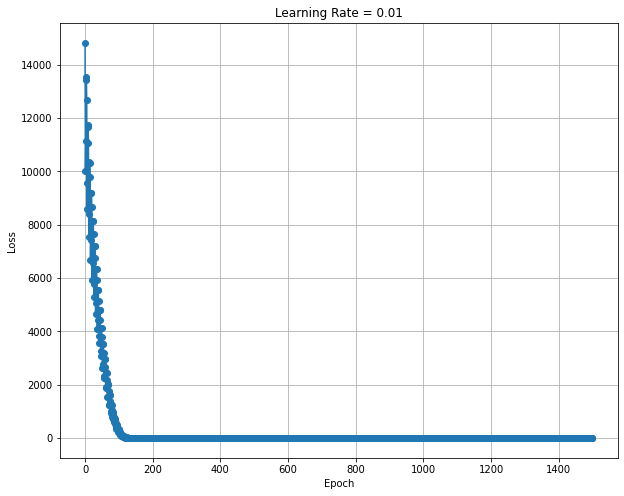

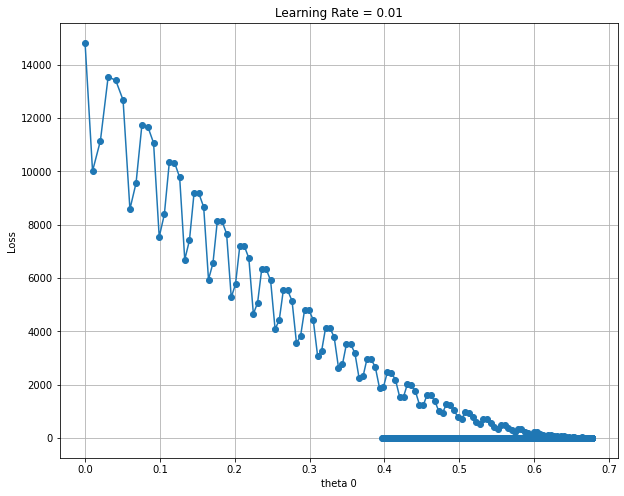

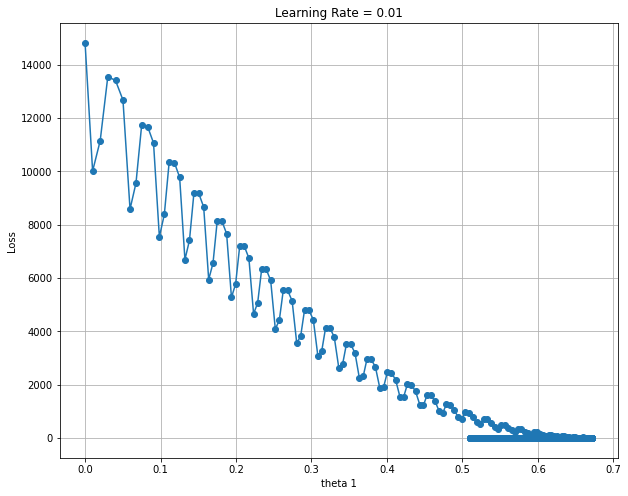

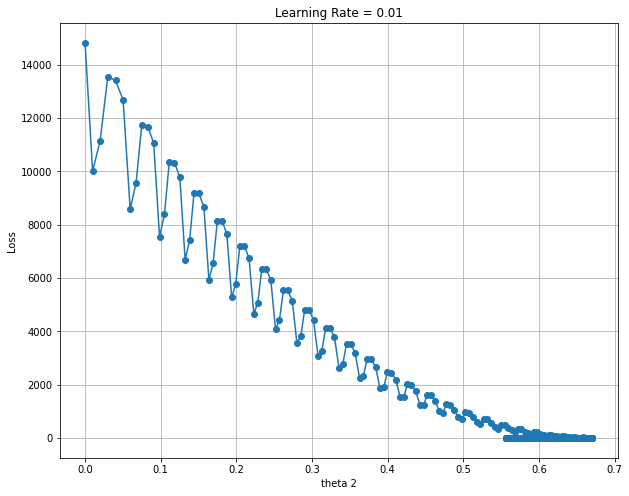

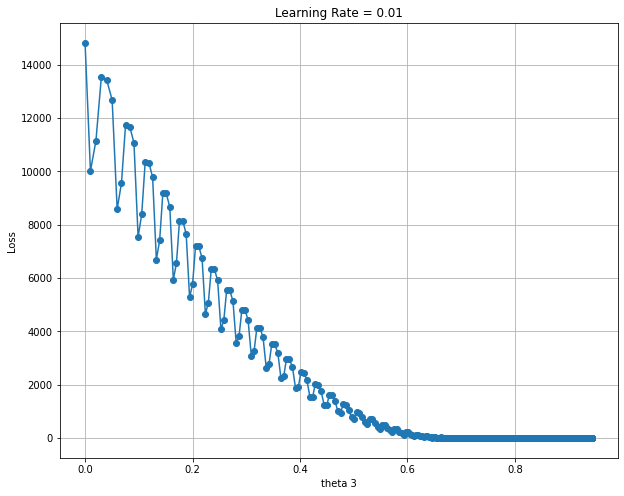

In [72]:
plot_loss_epoch(cost, alpha)
for i in range(np.array(theta_list).squeeze().shape[1]):
  plot_theta_loss(np.array(theta_list)[:,i], cost, alpha, f'theta {i}')